<a href="https://colab.research.google.com/github/Aishwaryasasanapuri/Credit_card_fraud_detection/blob/main/Credit_card_fraud_detection_Capstone_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center"><font color=saddlebrown> Credit Card Fraud Detection </font></div>


### <font color=teal>Problem Statement: </font>
In this project we will predict fraudulent credit card transactions with the help of Machine learning models.


### <font color=teal>Business Problem Overview</font>

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.
In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.

### <font color=teal>Business Objective</font>

Credit card fraud is any dishonest act and behaviour to obtain information without the proper authorization from the account holder for financial gain. Among different ways of frauds, Skimming is the most common one, which is the way of duplicating of information located on the magnetic strip of the card.  Apart from this, the other ways are:
- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stolen/lost credit cards
- Fraudulent telemarketing

## Importing Libraries:

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

pd.set_option('display.max_columns', None)

## Data Quality Check

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mapping Google drive to Kaggle API

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Kaggle'

In [ ]:
%cd '/content/drive/My Drive/'

/content/drive/My Drive


In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#### Reading Dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Kaggle/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
len(df.index)

284807

In [ ]:
# Check for Null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#observe the different feature type present in the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#checking the type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# percentage of missing values in each row
round(100 * (df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=False)

284806    0.0
94937     0.0
94931     0.0
94932     0.0
94933     0.0
         ... 
189864    0.0
189863    0.0
189862    0.0
189861    0.0
0         0.0
Length: 284807, dtype: float64

> We can see there are no null/Missing values in the dataset.

In [ ]:
# Checking the total Size of the dataset
df.shape

(284807, 31)

In [ ]:
#checking duplicates
df_new = df.copy()
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [ ]:
# Checking the total Size of the dataset
df.shape

(283726, 31)

> **We can see duplicates records are present in the dataset**

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
Fradulent_transaction = round(df['Class'].value_counts()[0]/len(df) * 100,2)
print('No Frauds',normal_share)
print('Frauds',fraud_share)
print('Fradulent_transaction',Fradulent_transaction)

No Frauds 99.83328986416473
Frauds 0.1667101358352777
Fradulent_transaction 99.83


Text(0, 0.5, 'Frequency')

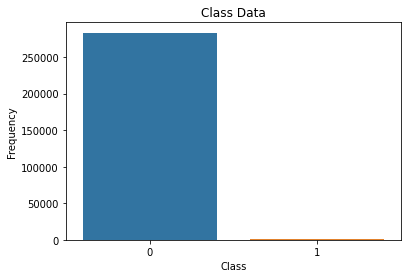

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.countplot('Class',data=df )
plt.title("Class Data")
plt.xlabel("Class")
plt.ylabel("Frequency")
#sns.countplot(round(df['Class'].value_counts()/len(df) * 100,2),data=df)

> #### We can see that its a class imbalance problem, because normal transactions are more than 99% but the fraud transactions are very less.

## Exploratory data analysis

In [ ]:
# Splitting the data to two dataframes fraud data and normal data

fraud_data = df[df.Class == 1]
normal_data = df[df.Class == 0]

Text(0, 0.5, 'Class')

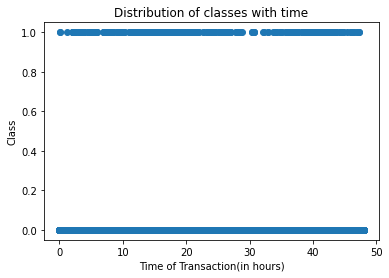

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df['Time']/(60*60),df['Class'])
plt.title('Distribution of classes with time')
plt.xlabel('Time of Transaction(in hours)')
plt.ylabel('Class')

#### Checking the linearity of the data with respect to the V1 to V28 variables. This will help us take decisions during the logistic and SVM model building

In [ ]:
relation_with_target = []
for i in range(1,29):
  x = 'V' + str(i)
  relation_with_target.append(x)

#### Below explains what we do not have any linear separator to divide the data of class 0 and 1, as we can see most of the datapoints lie in the range of -50 to 50 for V1 to V28 variables. 

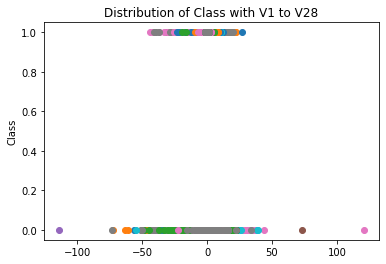

In [ ]:
for cols in relation_with_target:
  plt.scatter(df[cols],df['Class'])
  plt.title('Distribution of Class with V1 to V28')
  #plt.legend(relation_with_target, loc = 'upper right')
  plt.ylabel('Class')

Text(0, 0.5, 'Frequency')

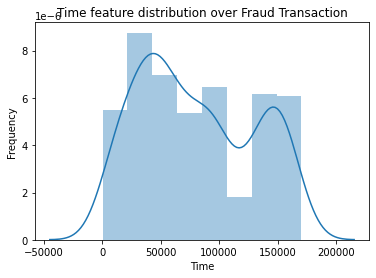

In [ ]:
#checking the transaction time for normal and fruadlent data

sns.distplot(fraud_data.Time)
plt.title("Time feature distribution over Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

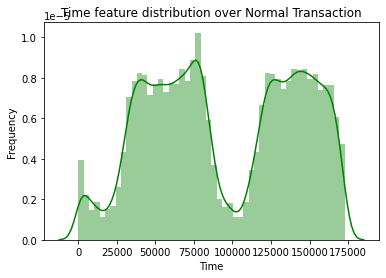

In [ ]:
sns.distplot(normal_data.Time, color='g')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

Text(0, 0.5, 'Class')

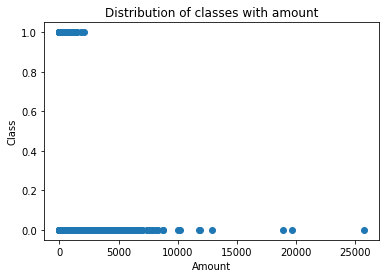

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df['Amount'],df['Class'])
plt.title('Distribution of classes with amount')
plt.xlabel('Amount')
plt.ylabel('Class')

Text(0, 0.5, 'Frequency')

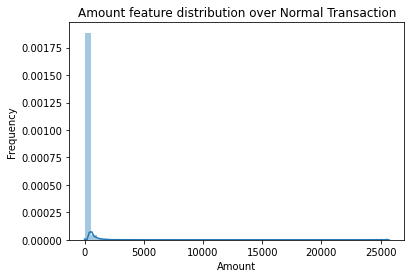

In [ ]:
sns.distplot(normal_data.Amount)
plt.title("Amount feature distribution over Normal Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

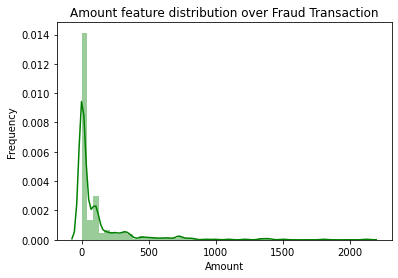

In [ ]:
sns.distplot(fraud_data.Amount, color='g')
plt.title("Amount feature distribution over Fraud Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

In [ ]:
df.loc[df['Class'] == 1,['Amount']].describe(percentiles = [0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]) #fraud_data

,Amount
count,473.000000
mean,123.871860
std,260.211041
min,0.000000
0%,0.000000
5%,0.000000
10%,0.760000
20%,1.000000
30%,1.000000
40%,2.260000


In [ ]:
df.loc[df['Class'] == 0,['Amount']].describe(percentiles = [0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]) #Normal_data

,Amount
count,283253.000000
mean,88.413575
std,250.379023
min,0.000000
0%,0.000000
5%,0.920000
10%,1.000000
20%,3.580000
30%,8.920000
40%,13.080000


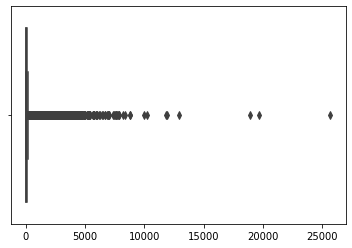

In [ ]:
sns.boxplot(df.loc[df['Class'] == 0,['Amount']])
plt.show()

In [ ]:

df.describe(percentiles=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
0%,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
10%,35028.000000,-1.882673,-1.361543,-1.801132,-1.658412,-1.299710,-1.167933,-1.076596,-0.458614,-1.295183,-1.032272,-1.287658,-1.148751,-1.280102,-1.003077,-1.172535,-1.058264,-0.804455,-0.976348,-0.984813,-0.388705,-0.367053,-0.867384,-0.328227,-0.870040,-0.606200,-0.547729,-0.209340,-0.154631,1.000000,0.000000
20%,47702.000000,-1.128576,-0.792544,-1.167990,-1.067808,-0.857530,-0.878857,-0.681973,-0.266406,-0.810159,-0.666692,-0.915947,-0.573297,-0.823877,-0.567429,-0.747127,-0.615084,-0.575941,-0.625847,-0.582828,-0.250805,-0.266277,-0.641857,-0.203474,-0.444035,-0.392124,-0.389098,-0.090679,-0.065249,3.580000,0.000000
30%,60770.500000,-0.743757,-0.438307,-0.616121,-0.697859,-0.543035,-0.668451,-0.424501,-0.158421,-0.503380,-0.425831,-0.611978,-0.272672,-0.496456,-0.312808,-0.437382,-0.341871,-0.397200,-0.384273,-0.345246,-0.178403,-0.187780,-0.434832,-0.126020,-0.263354,-0.258701,-0.274299,-0.053992,-0.040139,8.920000,0.000000
40%,73272.000000,-0.424167,-0.155367,-0.198760,-0.396537,-0.288912,-0.480399,-0.158349,-0.066306,-0.258639,-0.248547,-0.316344,-0.051096,-0.238759,-0.119889,-0.187409,-0.124087,-0.235927,-0.184247,-0.162262,-0.120714,-0.106443,-0.201967,-0.065005,-0.045770,-0.129149,-0.166221,-0.024220,-0.011831,13.040000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000



### Let's check the correlation between the features in the dataset 


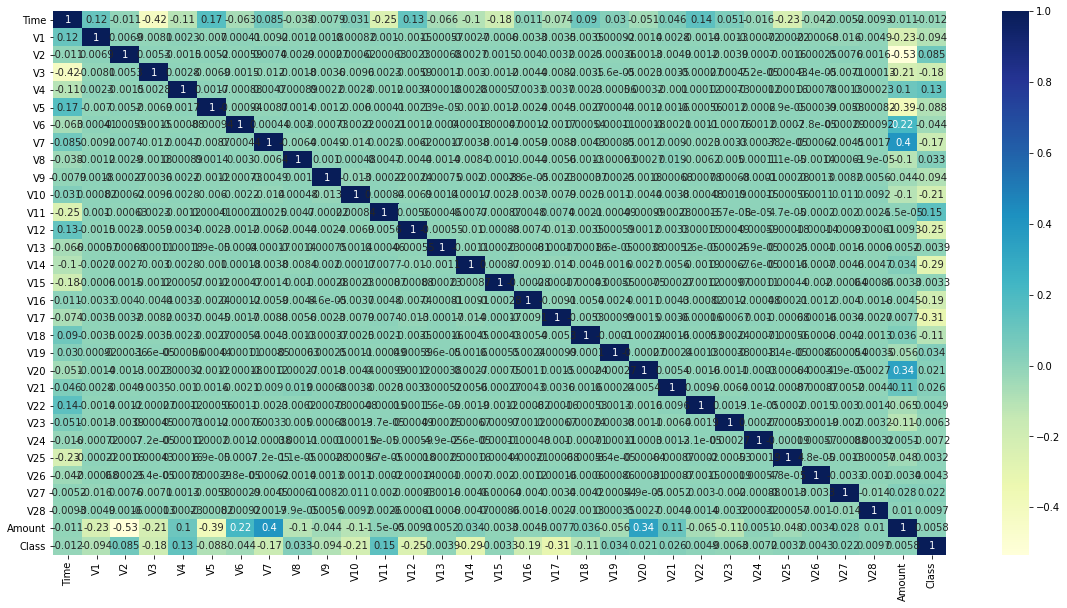

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")

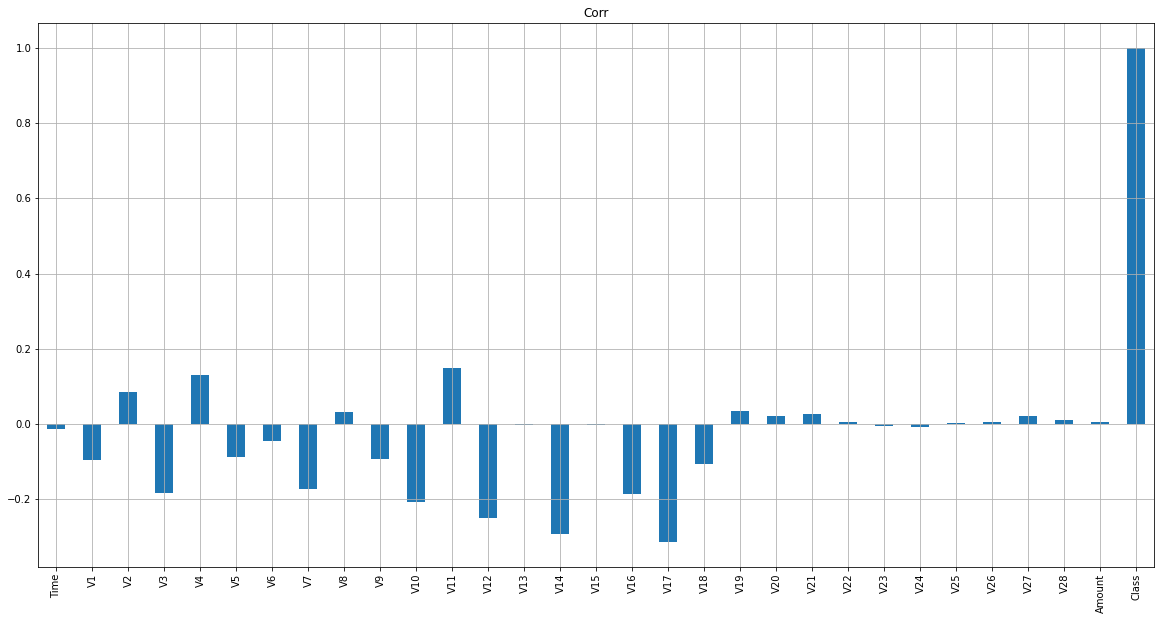

In [ ]:
df.corrwith(df.Class).plot.bar(figsize= (20,10),title="Corr", fontsize=10, grid=True)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# We will drop the Time variable since the distribution is similar for fraud and non-fraud classes. The time variable does not seem to have any relationship with the target variable.
# Whereas we will keep the Amount since we cleary see that the amount is distributed between 1 to 5000 for all fraud data and spread up to 25000 for the non fraud cases.

df.drop('Time',axis=1,inplace=True)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scalar = StandardScaler()

df['scaled_amount'] = std_scalar.fit_transform(df['Amount'].values.reshape(-1,1))

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073813


In [ ]:
df.drop('Amount',axis=1,inplace=True)

In [ ]:
df.rename(columns={'scaled_amount':'Amount'},inplace=True)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


#### We will not remove outliers as of now since every variable has a huge distribution length including Amount. We do not want to modify V1 to V28 variables since they are not known to us and we do not want to modify any data there.

### Splitting the data into train & test data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
X = df.drop(['Class'],axis=1)
y= df['Class']

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (198608, 29)
y_train -  (198608,)
X_test -  (85118, 29)
y_test -  (85118,)


#### Below is how we have divided the data in the Y variable. 0.15% of the data lies in train Y and 0.19% in test Y.

In [ ]:
100*(y_train.sum()/len(y_train))

0.16112140497865143

In [ ]:
100*(y_test.sum()/len(y_test))

0.17975046406165557

### Plotting the distribution of a variable

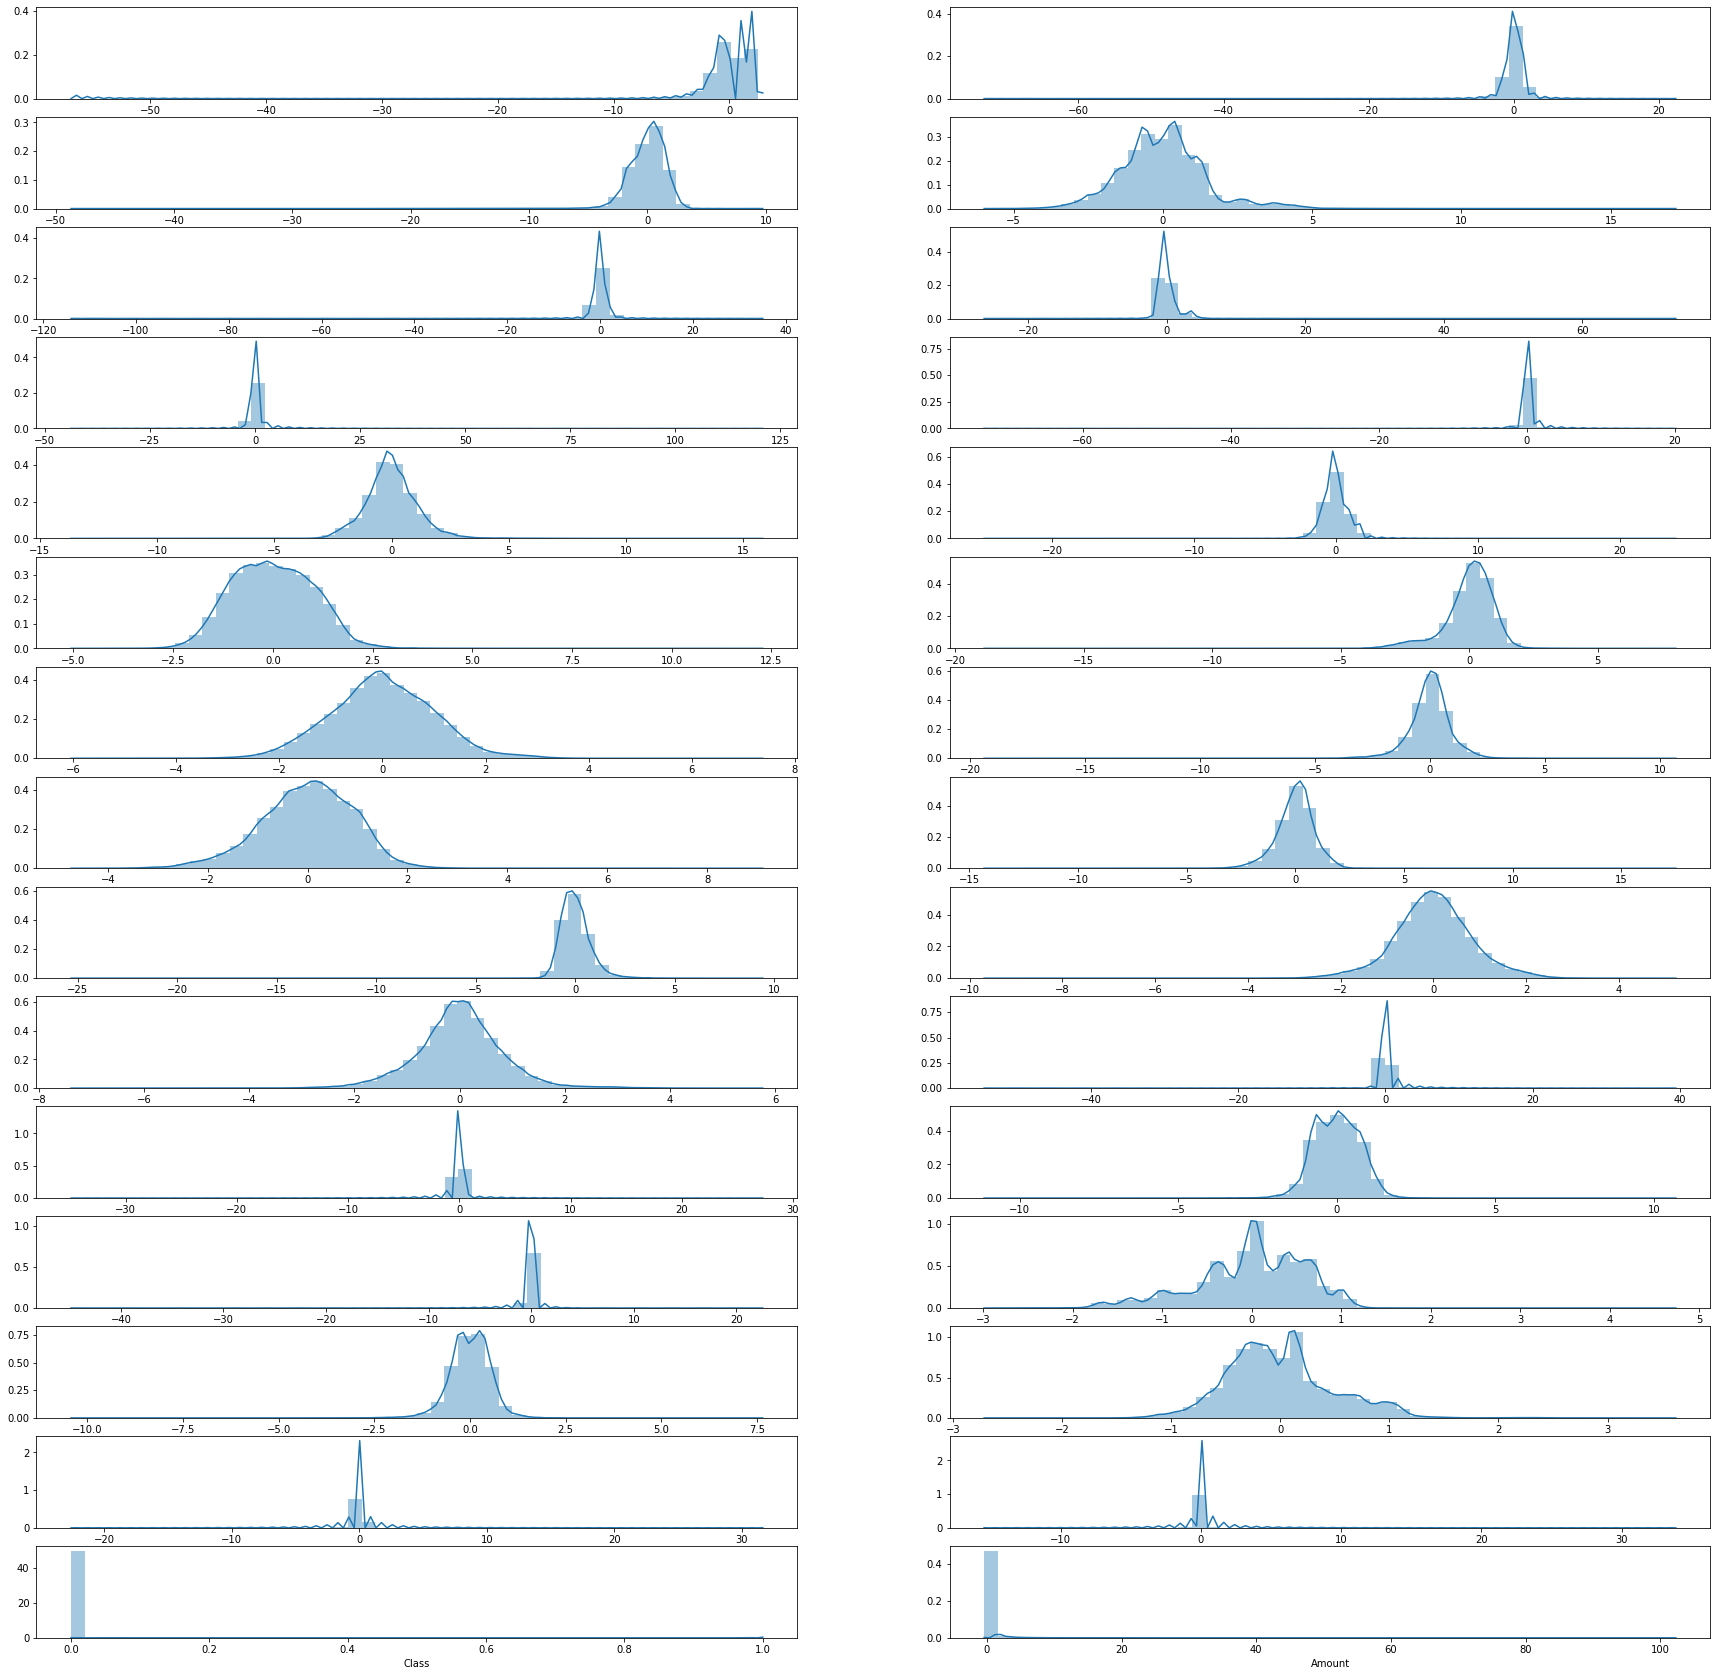

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
cols = list(df.columns)
plt.figure(1,figsize=(30,30))
count = 1
for cols in df.columns:
    plt.subplot(15,2,count)
    #plt.title('Distribution of {0}'.format(cols))
    sns.distplot(df[cols])
    count = count + 1
plt.show()

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
10201,-3.544583,-2.017945,0.533444,-0.257317,-3.258624,2.628180,2.337337,-1.192511,1.896110,1.731256,2.826955,-3.483972,0.799653,-0.067525,0.315482,0.817446,1.096814,-1.091472,0.900169,-2.486676,-0.673491,1.488596,0.212412,-0.178197,-0.065951,-0.041249,-0.842003,0.510324,2.283744
276263,0.091427,0.981931,-0.333003,-0.637487,0.932788,-0.502517,0.849190,0.060425,-0.300482,-0.669539,1.148706,0.573724,-0.211587,-0.786554,-0.889658,0.438790,0.222185,0.163276,-0.055758,0.007894,-0.278727,-0.684828,0.101051,0.598491,-0.486898,0.092747,0.221936,0.074431,-0.348175
176633,0.210133,1.132638,-1.498822,-0.290631,0.927390,-0.516531,0.716152,0.162324,-0.333188,-1.196938,-1.117695,0.338297,1.511651,-0.841250,0.602760,0.397824,0.212996,0.843011,0.025920,-0.032018,0.307387,0.858692,-0.086730,-0.006624,-0.092105,-0.145166,-0.077319,-0.042017,-0.182360
126008,-6.964205,6.675916,-4.436875,0.985868,-2.844862,2.510583,-8.944899,-12.314133,-2.506145,-3.499423,-0.085754,2.434355,-1.907842,3.560752,0.134389,1.889866,2.836012,1.439494,-0.892249,3.648163,-7.220393,2.613104,1.607706,-0.592293,-0.348290,-0.373577,-0.523881,0.266759,-0.349333
215215,-0.562231,0.223597,-0.724938,-1.140259,1.241340,-1.856683,1.416694,-0.633017,-0.468428,-0.305738,-0.783247,0.035867,0.445140,0.355516,-0.089126,-0.241890,-0.452120,-0.742859,0.130298,-0.375133,0.061771,0.469512,0.332842,-0.003599,-0.013264,1.283713,-0.245104,-0.047722,-0.313431


### Since there is skewness present in the distribution,we will transform the data to make it more normally distributed. We will take the entire data of train, fit and transform on it and apply the transformation on the test data ###

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt = PowerTransformer(copy=False)
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

#### We will fit and transform the entire dataset 

In [ ]:
pt.fit_transform(X_train)

array([[-1.63314399e+00, -1.22939148e+00,  2.50772060e-01, ...,
        -2.07957170e+00,  1.56136898e+00,  2.04565126e+00],
       [-2.06380259e-01,  6.11915881e-01, -3.77577865e-01, ...,
         5.47945024e-01,  2.40070146e-01, -1.02859287e+00],
       [-1.30516220e-01,  7.26187457e-01, -1.03922317e+00, ...,
        -2.09266956e-01, -1.21816225e-01,  1.58705871e-01],
       ...,
       [ 1.57300997e+00, -1.02184985e+00, -8.25282119e-01, ...,
         2.56709995e-05, -8.95529429e-02,  9.22181704e-01],
       [ 4.18883032e-01, -1.18782857e+00, -1.93569783e+00, ...,
        -6.02557723e-01,  3.46810298e-02,  2.03883728e+00],
       [ 8.10216412e-01, -7.42375376e-01, -8.56319485e-02, ...,
        -3.95904704e-02,  3.89278416e-02,  4.78194358e-01]])

In [ ]:
pt.transform(X_test)

array([[ 1.32204534, -0.85788849,  0.16413675, ...,  0.02634753,
        -0.08861418,  0.39090672],
       [-0.99703402,  1.02112758, -0.99366887, ..., -0.88551512,
        -0.3609575 ,  0.16092966],
       [-0.7498708 ,  0.32033532, -0.1572716 , ..., -0.01328527,
         0.20820057, -1.00333962],
       ...,
       [-0.46209061,  0.81415304,  0.03303932, ...,  0.12247252,
         0.46218365, -1.03896277],
       [-0.03730898,  0.13453122, -1.20436435, ...,  0.24682589,
         0.3495044 ,  1.42520505],
       [-0.51594973,  0.61897007,  1.27388268, ...,  0.64654772,
         0.35731942, -0.94817469]])

In [ ]:
# Below we see that we have converted every variable to a gaussian transformation to train and test data

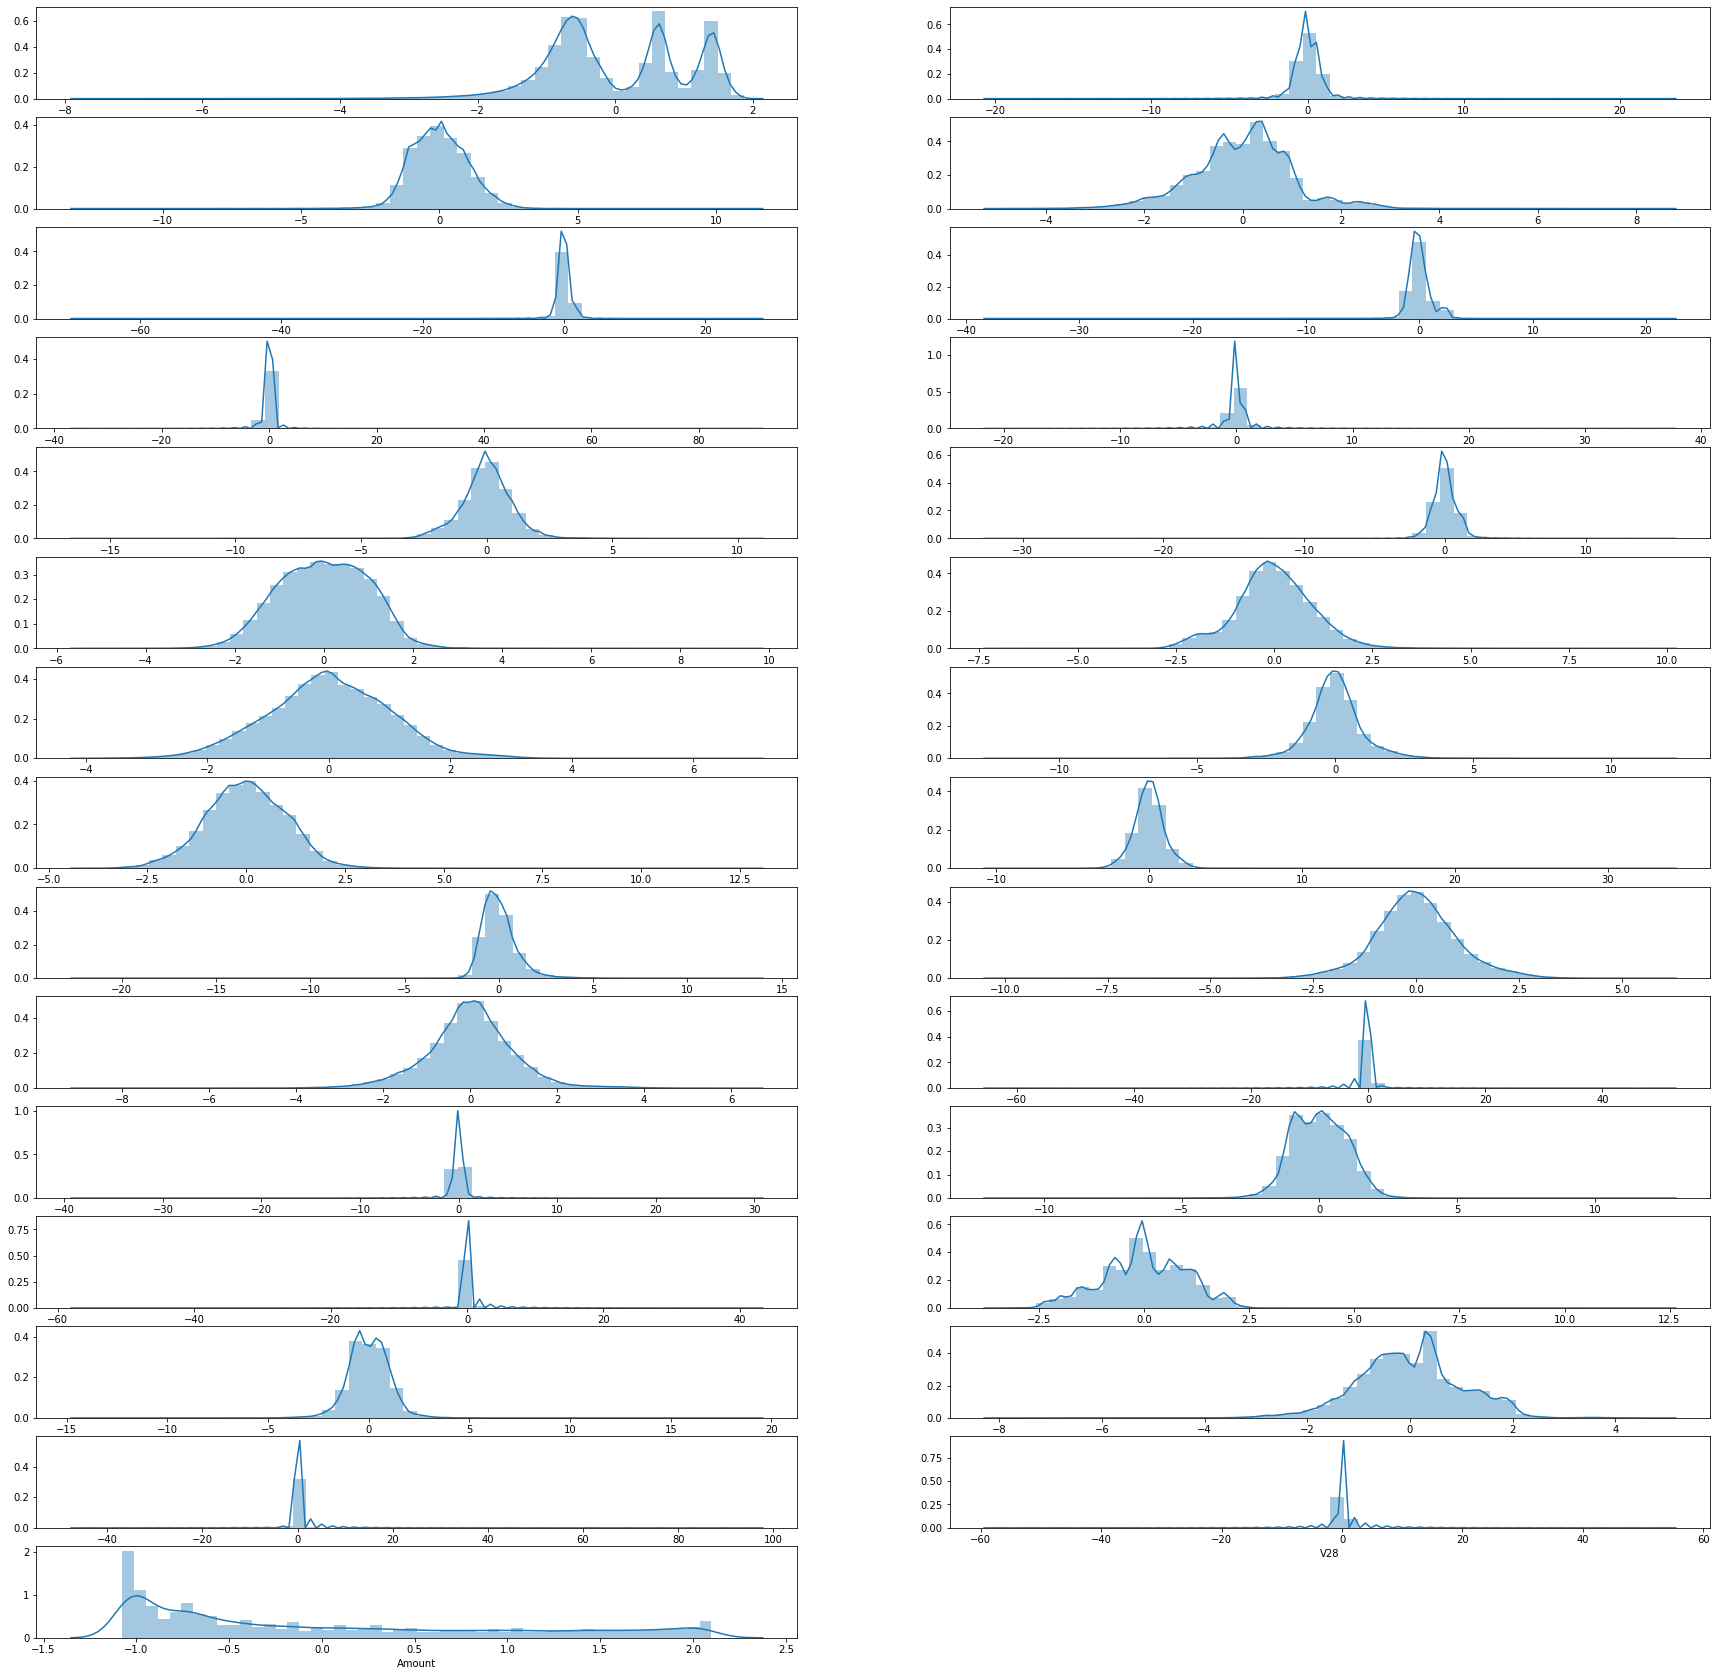

In [ ]:
cols = list(X_train.columns)
plt.figure(1,figsize=(30,30))
count = 1
for cols in X_train.columns:
    plt.subplot(15,2,count)
    #plt.title('Distribution of {0}'.format(cols))
    sns.distplot(X_train[cols])
    count = count + 1
plt.show()

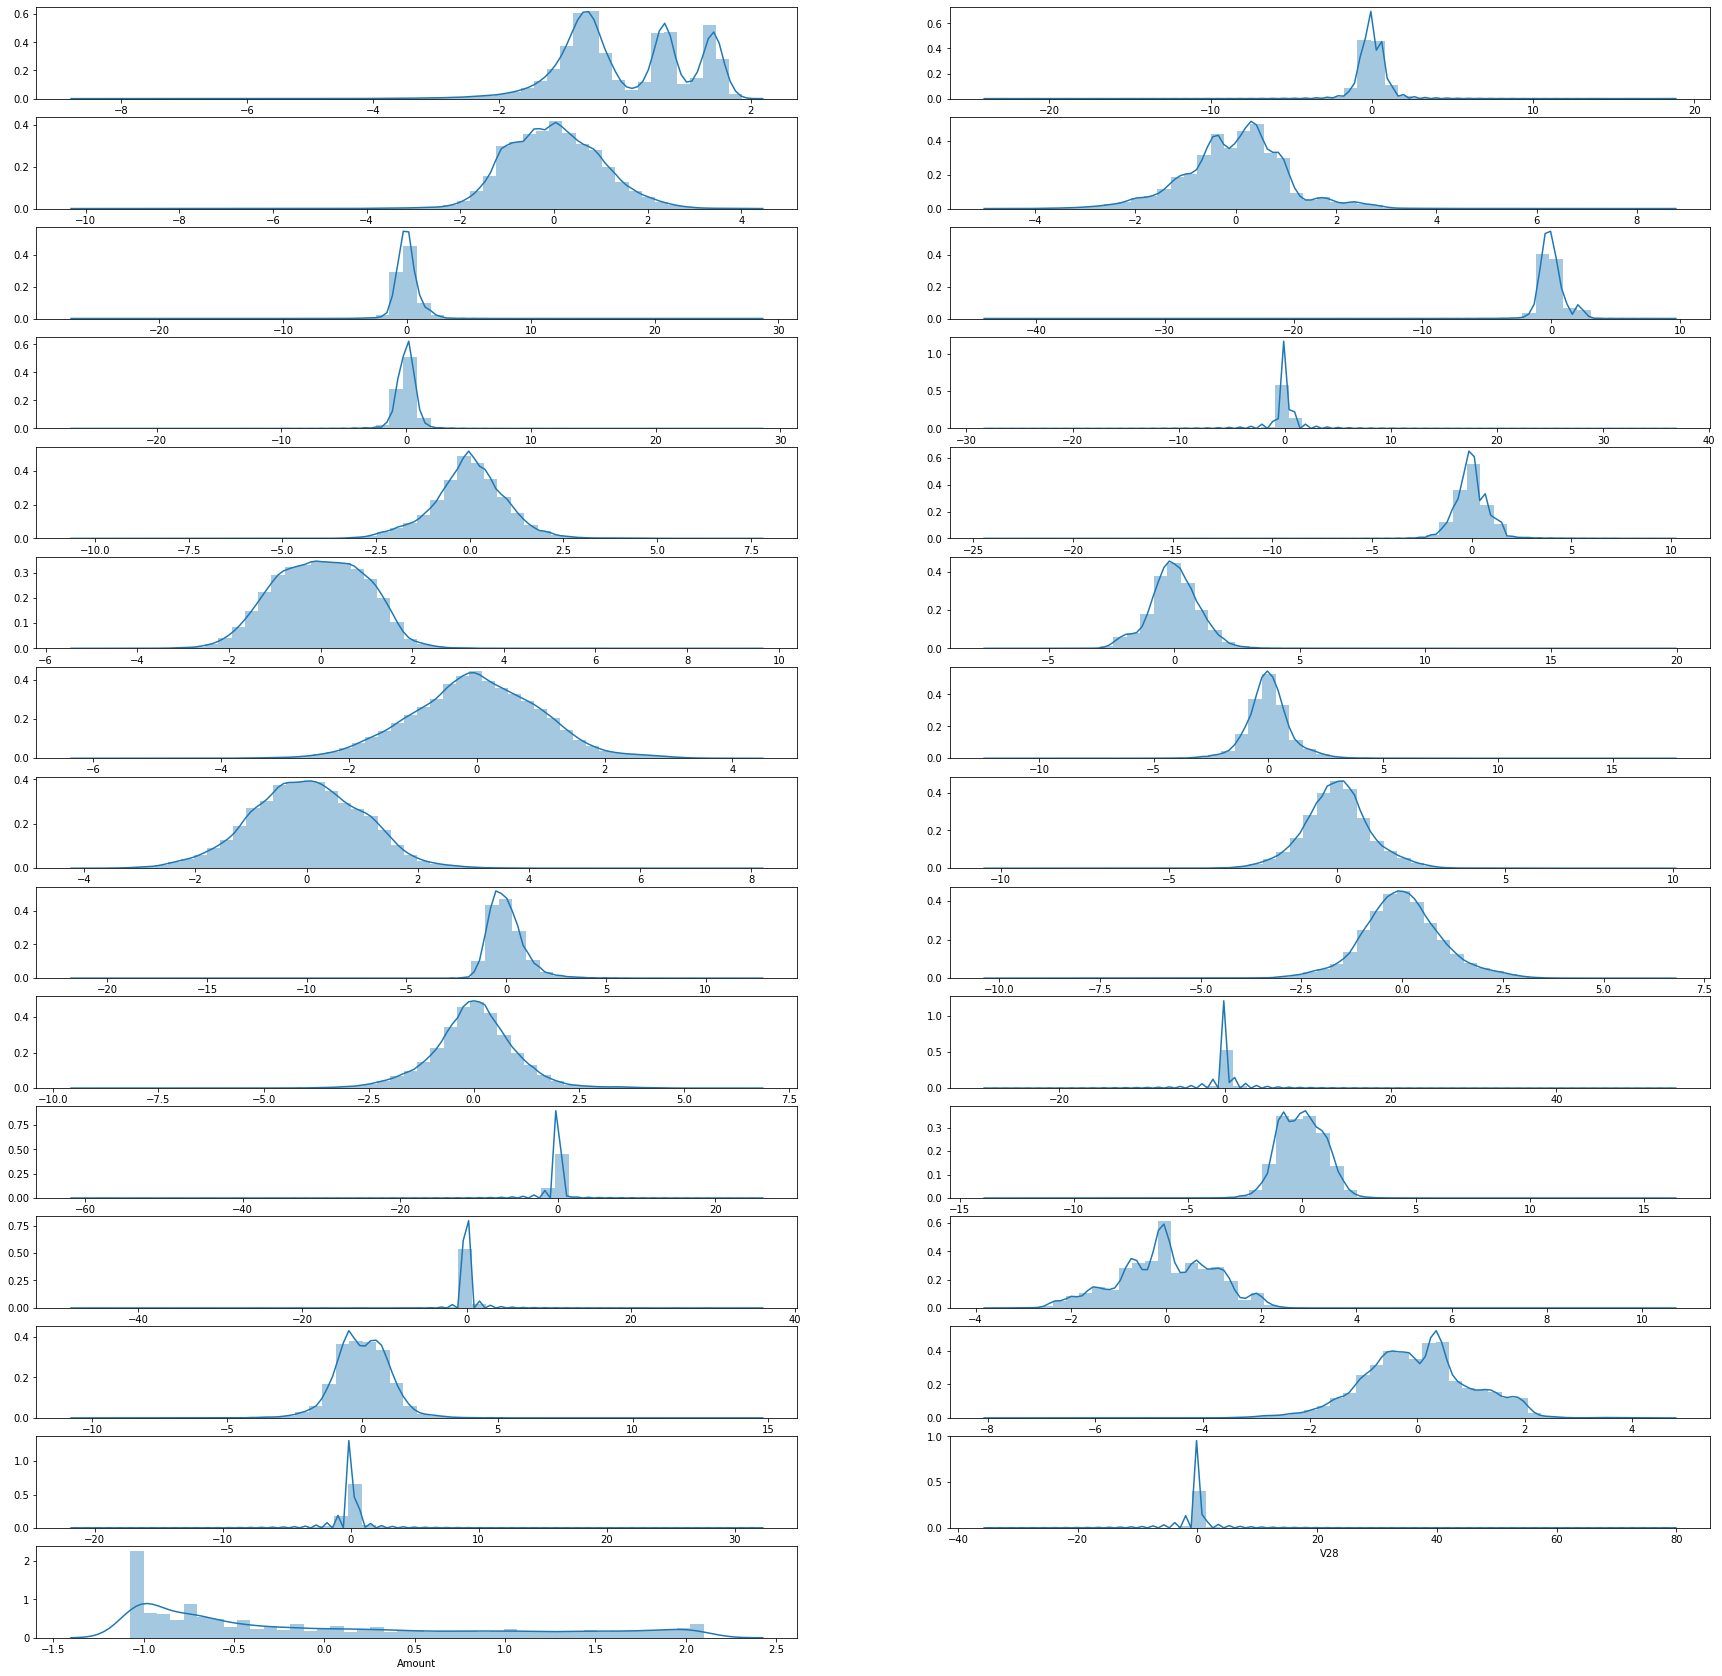

In [ ]:
cols = list(X_test.columns)
plt.figure(1,figsize=(30,30))
count = 1
for cols in X_test.columns:
    plt.subplot(15,2,count)
    #plt.title('Distribution of {0}'.format(cols))
    sns.distplot(X_test[cols])
    count = count + 1
plt.show()

## 1. Model Building Logistic Regression. 

To avoid imbalancing issue, here we will apply the dataset as it is, without applying any data balancing techniques. Because, we want to see how imbalanced data fares compared to balanced data, we will generate this logistic model without using balanced feature of sklearn and later compare with balanced dataset models

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression #import the package
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve

In [ ]:
logreg = LogisticRegression()

In [ ]:
model_1 = logreg.fit(X_train, y_train)

In [ ]:
X_train_pred = model_1.predict_proba(X_train)

In [ ]:
X_train_pred[:,1]

array([1.42469735e-03, 7.51561591e-05, 4.25958646e-04, ...,
       3.71629321e-04, 4.72490819e-04, 3.08767130e-04])

In [ ]:
y_train_pred_final = pd.DataFrame({'Class':y_train.values, 'Class_Prob':X_train_pred[:,1]})
y_train_pred_final.head()

,Class,Class_Prob
0,0,0.001425
1,0,0.000075
2,0,0.000426
3,0,0.000020
4,0,0.000072


In [ ]:
#Finding ROC Curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Class, y_train_pred_final.Class_Prob, drop_intermediate = False )

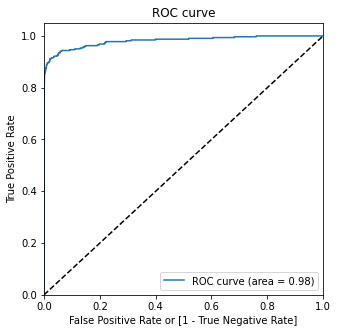

In [ ]:
draw_roc(y_train_pred_final.Class, y_train_pred_final.Class_Prob) # We get a very good ROC curve with AUC val as 0.99

In [ ]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Class_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001425,1,0,0,0,0,0,0,0,0,0
1,0,0.000075,1,0,0,0,0,0,0,0,0,0
2,0,0.000426,1,0,0,0,0,0,0,0,0,0
3,0,0.000020,1,0,0,0,0,0,0,0,0,0
4,0,0.000072,1,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001611  1.000000  0.000000
0.1   0.1  0.999215  0.778125  0.999571
0.2   0.2  0.999230  0.728125  0.999667
0.3   0.3  0.999265  0.687500  0.999768
0.4   0.4  0.999255  0.646875  0.999823
0.5   0.5  0.999215  0.606250  0.999849
0.6   0.6  0.999154  0.565625  0.999854
0.7   0.7  0.999109  0.537500  0.999854
0.8   0.8  0.999069  0.509375  0.999859
0.9   0.9  0.998968  0.443750  0.999864


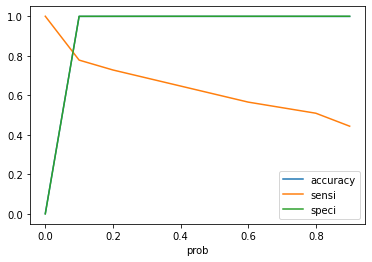

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Class_Prob.map( lambda x: 1 if x >= 0.15 else 0)
y_train_pred_final.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.001425,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000075,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000426,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000020,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000072,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final.final_predicted )
confusion2

array([[198212,     76],
       [    82,    238]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0]
TP / float(TP+FN) # Sensitivity

0.74375

In [ ]:
TN / float(TN+FP) #Specificity

0.9996167191156298

In [ ]:
acc_score=metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final.final_predicted)
acc_score

0.9992044630629179

In [ ]:
# Checking on test data

In [ ]:
X_test_pred = model_1.predict_proba(X_test)

In [ ]:
y_test_pred_final = pd.DataFrame({'Class':y_test.values, 'Class_Prob':X_test_pred[:,1]})
y_test_pred_final.head()

,Class,Class_Prob
0,0,0.000178
1,0,0.000130
2,0,0.000051
3,0,0.000375
4,0,0.000051


In [ ]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Class_Prob.map( lambda x: 1 if x >= 0.15 else 0)
y_test_pred_final.head()

,Class,Class_Prob,final_predicted
0,0,0.000178,0
1,0,0.000130,0
2,0,0.000051,0
3,0,0.000375,0
4,0,0.000051,0


In [ ]:
confusion2_test = metrics.confusion_matrix(y_test_pred_final.Class, y_test_pred_final.final_predicted )
confusion2_test

array([[84945,    20],
       [   36,   117]])

In [ ]:
TP = confusion2_test[1,1] # true positive 
TN = confusion2_test[0,0] # true negatives
FP = confusion2_test[0,1] # false positives
FN = confusion2_test[1,0]
TP / float(TP+FN) # Sensitivity

0.7647058823529411

In [ ]:
TN / float(TN+FP) #Specificity

0.9997646089566292

In [ ]:
acc_score=metrics.accuracy_score(y_test_pred_final.Class, y_test_pred_final.final_predicted)
acc_score

0.9993420898047417

In [ ]:
f1_score(y_test_pred_final.Class,y_test_pred_final.final_predicted)

0.8068965517241379

> ### We can clearly see that the sensitivity goes for a toss when we use imbalanced dataset. True negative rate is still very good because we have almost all data points as classified 0. The sensitivity which is very important in this case because we do not want to miss out on identifying actual fraud, is low which hovers around 76%

### Similarly explore other algorithms by building models like:

- SVM
- Decision Tree
- Random Forest
- XGBoost

## Model building using K-Nearest Neighbors


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=12)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [ ]:
# Try KNN to see how well it predicts fraud on the dataset
pred= model_knn.predict(X_test)

[[56622    11]
 [   32    81]]


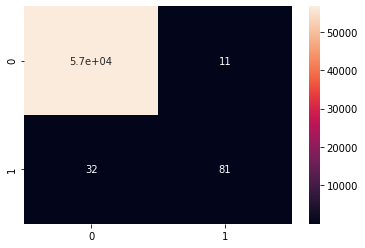

In [ ]:
print(confusion_matrix(y_test,pred))

sns.heatmap(confusion_matrix(y_test,pred), annot=True)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.88      0.72      0.79       113

    accuracy                           1.00     56746
   macro avg       0.94      0.86      0.89     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
print("Accuracy -->",accuracy_score(y_test,pred))
print("Precison -->",precision_score(y_test,pred))
print("Recall -->",recall_score(y_test,pred))
print("F1 -->",f1_score(y_test,pred))
print("MCC -->",matthews_corrcoef(y_test,pred))

Accuracy --> 0.9992422373383146
Precison --> 0.8804347826086957
Recall --> 0.7168141592920354
F1 --> 0.7902439024390243
MCC --> 0.7940606645673838


In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = model_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

AUC -  0.9377846400883564 



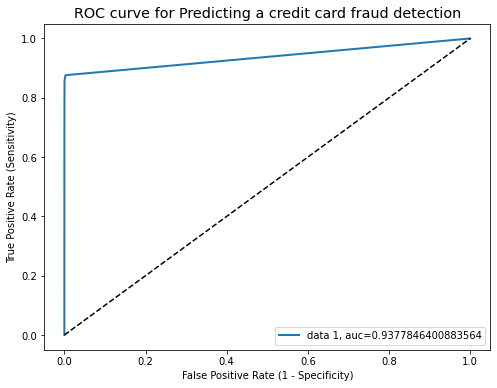

In [ ]:
# plot ROC Curve

plt.figure(figsize=(8,6))
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### Model building using Random Forest

In [ ]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(n_jobs = -1, oob_score=True)

# hyperparameter space
#params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

param = {
    'max_depth': range(5,6),
    'min_samples_leaf': range(10,30, 50),
    'min_samples_split': range(20, 60, 100),
    'max_features': ['auto', 0.4],
    'criterion': ["entropy", "gini"]
}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rf_model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 51.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              o

In [ ]:
scores_rf = pd.DataFrame(rf_model.cv_results_)
scores_rf.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,225.899829,6.659019,0.780583,0.054755,gini,auto,"{'criterion': 'gini', 'max_features': 'auto'}",0.951468,0.943390,0.935484,0.943803,0.959849,0.946799,0.008255,4
1,472.853930,24.264611,0.800582,0.051952,gini,0.4,"{'criterion': 'gini', 'max_features': 0.4}",0.944197,0.943694,0.959559,0.944009,0.952177,0.948727,0.006283,3
2,176.837435,5.015548,0.633307,0.012133,entropy,auto,"{'criterion': 'entropy', 'max_features': 'auto'}",0.943658,0.935812,0.959326,0.959752,0.959433,0.951596,0.009998,2


In [ ]:
from imblearn.metrics import sensitivity_specificity_support
# predict on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[84955    10]
 [   31   122]]
Sensitivity: 	0.8
Specificity: 	1.0
AUC:    	 0.94


In [ ]:
# print best hyperparameters
print("Best AUC: ", rf_model.best_score_)
print("Best hyperparameters: ", rf_model.best_params_)
print(rf_model.best_estimator_)

Best AUC:  0.951787064658666
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=0.4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)


In [ ]:
# model with optimal hyperparameters
clf_rf = RandomForestClassifier(criterion = "entropy",
                                  random_state = 100,
                                  max_features = 0.4,
                                  max_depth=5, 
                                  min_samples_leaf=1,
                                  min_samples_split= 2,
                                  n_estimators = 200)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features=0.4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [ ]:
# Making predictions
X_test_rf = pd.DataFrame(data=X_test)

y_pred_rf = clf_rf.predict(X_test_rf)

In [ ]:
# Printing classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84965
           1       0.92      0.78      0.84       153

    accuracy                           1.00     85118
   macro avg       0.96      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
from imblearn.metrics import sensitivity_specificity_support
# predict on test data
y_pred = clf_rf.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

TN = cm[0,0] # true positive 
TP = cm[1,1] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] #false negatives

# Printing accuracy and recall
print("accuracy", metrics.accuracy_score(y_test, y_pred_rf))
print("recall", metrics.recall_score(y_test, y_pred_rf))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = clf_rf.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[84954    11]
 [   34   119]]
accuracy 0.9994713221645245
recall 0.7777777777777778
Sensitivity: 	0.78
Specificity: 	1.0
AUC:    	 0.97


### Gaussian Naive bayes on imbalanced data

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set and instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Training set score: 0.9776
Test set score: 0.9783
Model accuracy score: 0.9783
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84965
           1       0.07      0.83      0.12       153

    accuracy                           0.98     85118
   macro avg       0.53      0.90      0.56     85118
weighted avg       1.00      0.98      0.99     85118



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)

print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

[[83148  1817]
 [   26   127]]
Precision : 0.9786
Recall or Sensitivity : 0.9997
Specificity : 0.0653
False Positive Rate : 0.9347
True Positive Rate : 0.9997


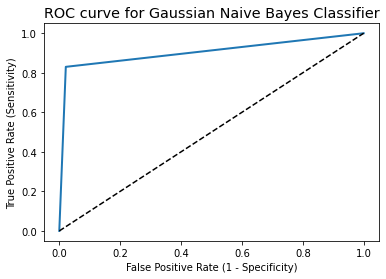

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

----------------------------------------------------------------------------------------------------------

### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

We can see , a good recall and Sensivity score for Random Forest Model

### Print the important features of the best model to understand the dataset


Top var = 14
2nd Top var = 17
3rd Top var = 10


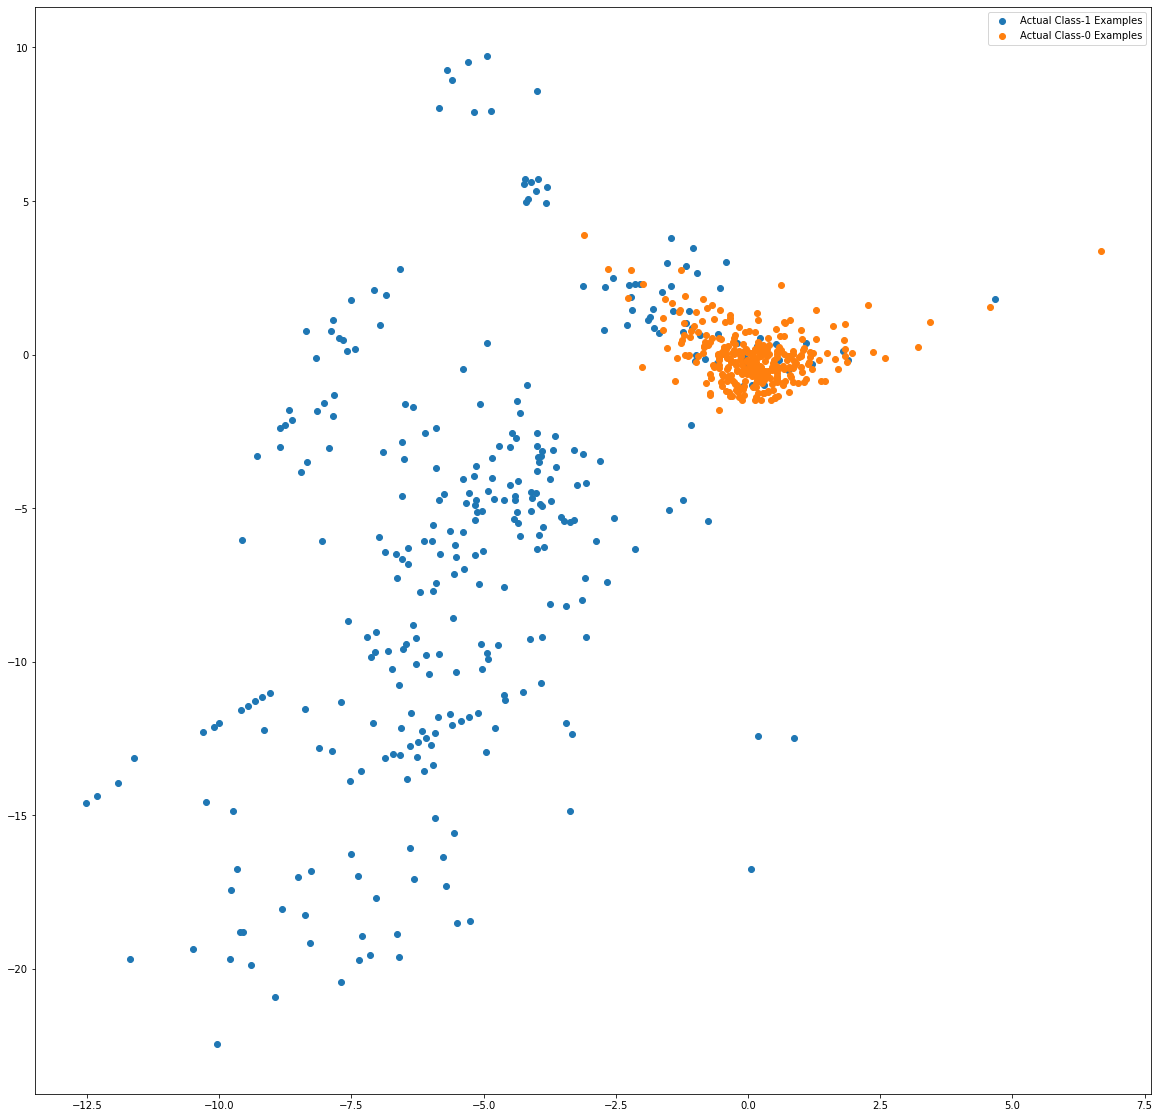

In [ ]:
var_imp = []
for i in clf_rf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_rf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_rf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_rf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_rf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_rf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
from collections import OrderedDict

features=list(X_train.columns.values)
features_dict={}

for name,importance in zip(features,clf_rf.feature_importances_):
    features_dict[name]= importance
    

dict_desc = OrderedDict(sorted(features_dict.items(),key = lambda kv:kv[1], reverse = True))


In [ ]:
dix = dict(dict_desc)

from itertools import islice

def look(n,iterable):
    return list(islice(iterable,n))

n=10
n_items= look(n,dix.items())

In [ ]:
importance = clf_rf.feature_importances_
importance, features = zip(*sorted(zip(importance, features)))


# create dataframe
feature_importance_df = pd.DataFrame({'variables': features, 'importance': importance})
#feature_importance = feature_importance[['variables', 'importance_percentage']]

feature_importance_df = feature_importance_df.sort_values(by = 'importance',axis =0, ascending = False)
feature_importance_df[0:15]

,variables,importance
28,V14,0.301407
27,V17,0.232763
26,V10,0.173492
25,V12,0.073659
24,V11,0.050769
23,V4,0.034092
22,V16,0.030349
21,V9,0.015950
20,V7,0.014249
19,V26,0.008459


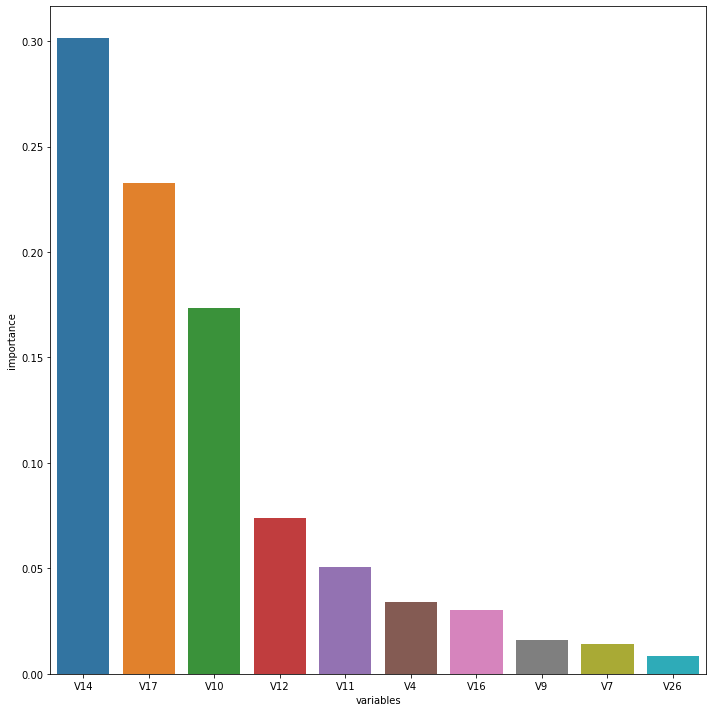

In [ ]:
# Plotting the features
plt.figure(figsize=(10, 10))

sns.barplot(x = "variables",
            y = "importance",
            data = feature_importance_df[0:10])

plt.tight_layout()
plt.show()

## Model building with balancing Classes
Let's now try different models , first by creating multiple datasets.

##### Perform class balancing with :
- Random Undersampling
- Random Oversampling
- SMOTE
- ADASYN

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## <a>1. Undersampled Data</a>

 "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Steps:
- The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
- Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.
- After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

**Note**: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [ ]:
y_train.value_counts()

0    198288
1       320
Name: Class, dtype: int64

In [ ]:
print('Original dataset shape %s' % Counter(y_train))

rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_under))

# Slit into train and test datasets
#X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, shuffle=True, test_size=0.2, random_state=0)

Original dataset shape Counter({0: 198288, 1: 320})
Resampled dataset shape Counter({0: 320, 1: 320})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## <a>2. Oversampled Data</a>

Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models. 

![image.png](attachment:image.png)


In [ ]:
print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_over))


Original dataset shape Counter({0: 198288, 1: 320})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0: 198288, 1: 198288})


## <a>3. SMOTE Data (Synthetic Minority Over-sampling Technique) </a>

In this technique, instead of simply duplicating data from the minority class, we synthesize new data points from the minority class. This is a type of data augmentation for tabular data can be very effective. This approach to synthesizing new data is called the Synthetic Minority Oversampling Technique, or SMOTE for short. 

![image.png](attachment:image.png)

Understanding SMOTE:

- **Solving the Class Imbalance**: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
- **Location of the synthetic points**: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.


In [ ]:
print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_smote))


Original dataset shape Counter({0: 198288, 1: 320})
Resampled dataset shape Counter({0: 198288, 1: 198288})


### Print the class distribution after applying SMOTE 

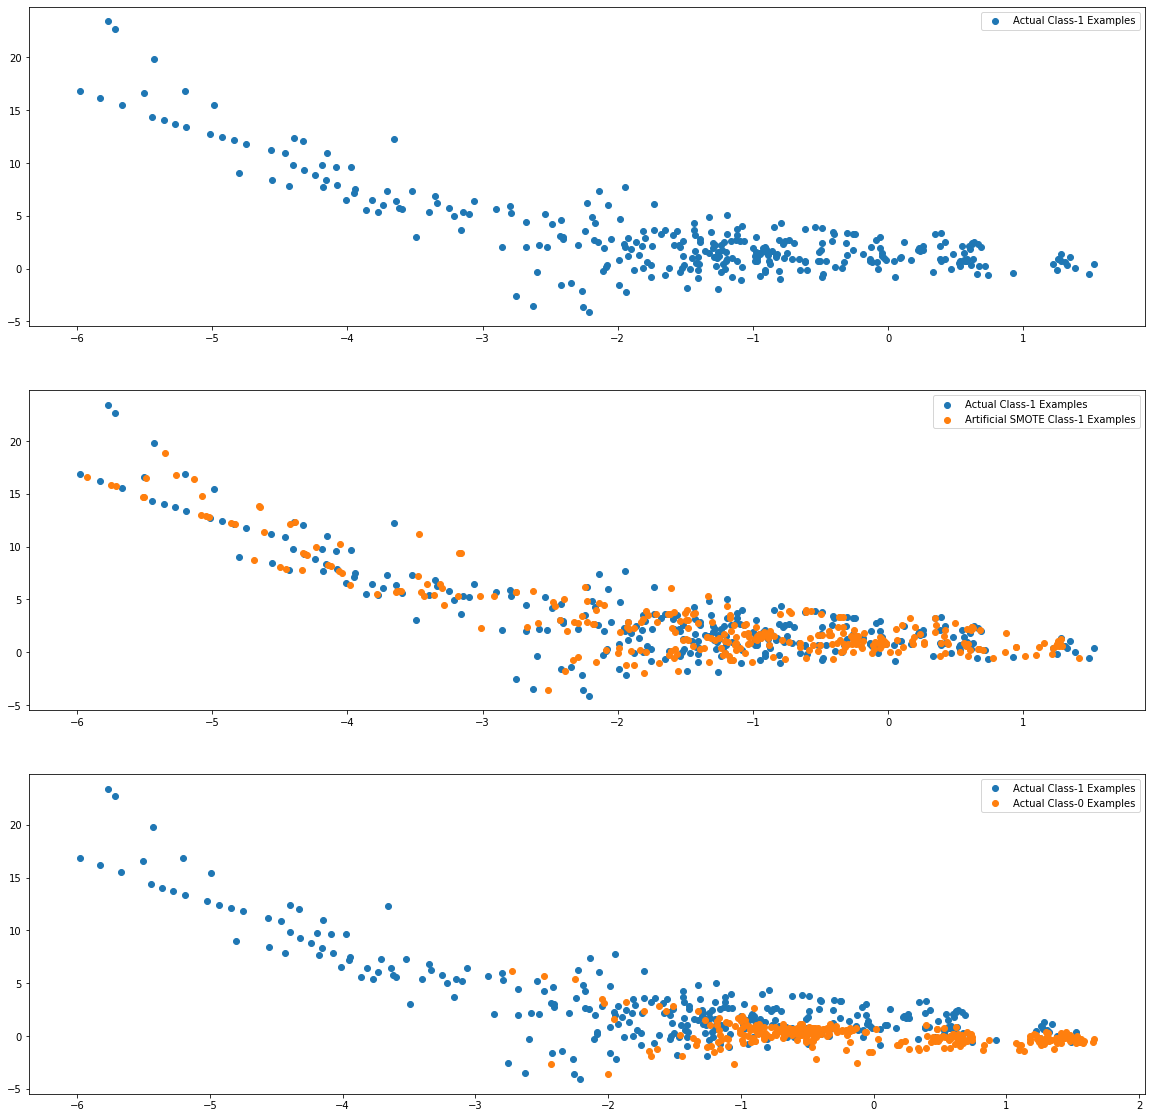

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## <a>4. ADASYN Data</a>


ADASYN (Adaptive Synthetic) is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data, and generating more data for “harder to learn” examples

![image.png](attachment:image.png)

In [ ]:
print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_adasyn))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape Counter({0: 198288, 1: 320})
Resampled dataset shape Counter({0: 198288, 1: 198281})


### Print the class distribution after applying ADASYN

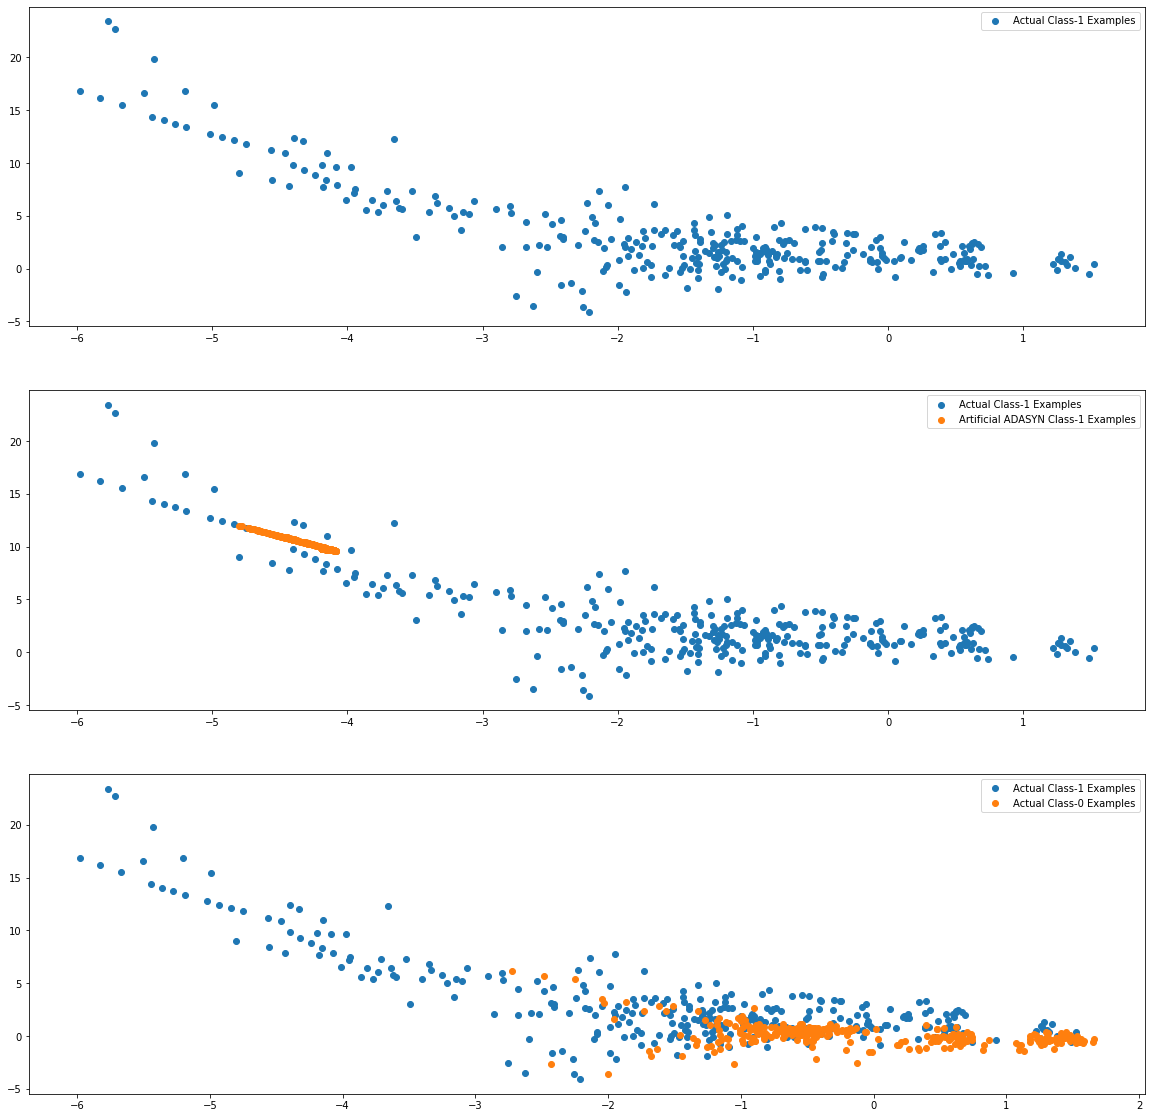

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

--------------------------------------------------------------------------------------------------------------------

## Model Building
- Build different models on the balanced dataset and see the result

## Building Logistic Regression on balanced data to see final outcome

In [ ]:
logreg = LogisticRegression()

In [ ]:
model_1 = logreg.fit(X_smote, y_smote)
X_train_pred = model_1.predict_proba(X_smote)
X_train_pred[:,1]

array([0.2460372 , 0.02741841, 0.05799452, ..., 0.87339506, 1.        ,
       1.        ])

In [ ]:
y_train_pred_final = pd.DataFrame({'Class':y_smote, 'Class_Prob':X_train_pred[:,1]})
y_train_pred_final.head()

,Class,Class_Prob
0,0,0.246037
1,0,0.027418
2,0,0.057995
3,0,0.000005
4,0,0.007362


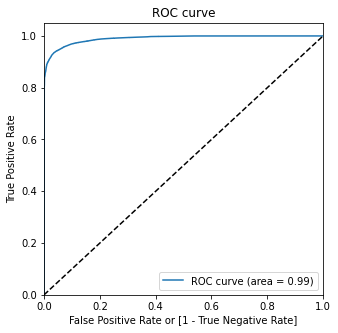

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Class, y_train_pred_final.Class_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Class, y_train_pred_final.Class_Prob)

In [ ]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Class_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.246037,1,1,1,0,0,0,0,0,0,0
1,0,0.027418,1,0,0,0,0,0,0,0,0,0
2,0,0.057995,1,0,0,0,0,0,0,0,0,0
3,0,0.000005,1,0,0,0,0,0,0,0,0,0
4,0,0.007362,1,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.893932  0.987604  0.800260
0.2   0.2  0.933521  0.970139  0.896902
0.3   0.3  0.944871  0.951838  0.937903
0.4   0.4  0.949235  0.939220  0.959251
0.5   0.5  0.949109  0.926758  0.971461
0.6   0.6  0.945990  0.911861  0.980120
0.7   0.7  0.942687  0.898713  0.986661
0.8   0.8  0.938993  0.887189  0.990796
0.9   0.9  0.928036  0.861212  0.994861


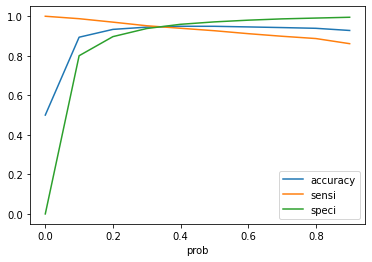

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Class_Prob.map( lambda x: 1 if x >= 0.38 else 0)
y_train_pred_final.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.246037,1,1,1,0,0,0,0,0,0,0,0
1,0,0.027418,1,0,0,0,0,0,0,0,0,0,0
2,0,0.057995,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000005,1,0,0,0,0,0,0,0,0,0,0
4,0,0.007362,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final.final_predicted )
confusion2 #Training confusion matrix

array([[189584,   8704],
       [ 11603, 186685]])

In [ ]:
X_test_pred = model_1.predict_proba(X_test)

In [ ]:
y_test_pred_final = pd.DataFrame({'Class':y_test.values, 'Class_Prob':X_test_pred[:,1]})
y_test_pred_final.head()

,Class,Class_Prob
0,0,0.000525
1,0,0.000445
2,0,0.003544
3,0,0.059593
4,0,0.004071


In [ ]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Class_Prob.map( lambda x: 1 if x >= 0.38 else 0)
y_test_pred_final.head()

,Class,Class_Prob,final_predicted
0,0,0.000525,0
1,0,0.000445,0
2,0,0.003544,0
3,0,0.059593,0
4,0,0.004071,0


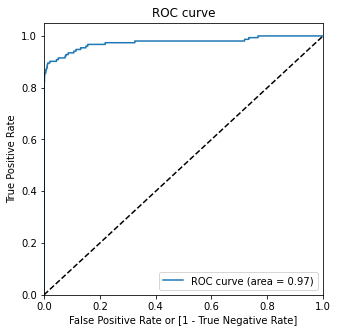

In [ ]:
draw_roc(y_test_pred_final.Class, y_test_pred_final.Class_Prob)

In [ ]:

confusion2_test = metrics.confusion_matrix(y_test_pred_final.Class, y_test_pred_final.final_predicted )
confusion2_test

array([[81111,  3854],
       [   14,   139]])

In [ ]:
TP = confusion2_test[1,1] # true positive 
TN = confusion2_test[0,0] # true negatives
FP = confusion2_test[0,1] # false positives
FN = confusion2_test[1,0]
TP / float(TP+FN) # Sensitivity

0.9084967320261438

In [ ]:
TN / float(TN+FP) #Specificity

0.9546401459424468

In [ ]:
f1_score(y_test_pred_final.Class,y_test_pred_final.final_predicted)

0.06705258080077182

### Checking on ADASYN data - logistic regression

In [ ]:
logreg = LogisticRegression()
model_1 = logreg.fit(X_adasyn, y_adasyn)

In [ ]:
X_train_pred = model_1.predict_proba(X_adasyn)
X_train_pred[:,1]

array([0.75699879, 0.07499926, 0.17828783, ..., 1.        , 1.        ,
       1.        ])

In [ ]:
y_train_pred_final = pd.DataFrame({'Class':y_adasyn, 'Class_Prob':X_train_pred[:,1]})
y_train_pred_final.head()

,Class,Class_Prob
0,0,7.569988e-01
1,0,7.499926e-02
2,0,1.782878e-01
3,0,2.698651e-07
4,0,2.249466e-02


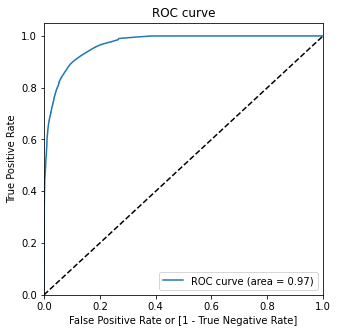

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Class, y_train_pred_final.Class_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Class, y_train_pred_final.Class_Prob)

In [ ]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Class_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,7.569988e-01,1,1,1,1,1,1,1,1,0,0
1,0,7.499926e-02,1,0,0,0,0,0,0,0,0,0
2,0,1.782878e-01,1,1,0,0,0,0,0,0,0,0
3,0,2.698651e-07,1,0,0,0,0,0,0,0,0,0
4,0,2.249466e-02,1,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.499991  1.000000  0.000000
0.1   0.1  0.805739  0.999970  0.611515
0.2   0.2  0.865948  0.979766  0.752133
0.3   0.3  0.889399  0.948104  0.830696
0.4   0.4  0.897213  0.913567  0.880860
0.5   0.5  0.896222  0.876549  0.915895
0.6   0.6  0.888736  0.839233  0.938236
0.7   0.7  0.874224  0.793308  0.955136
0.8   0.8  0.852154  0.735028  0.969277
0.9   0.9  0.822538  0.661314  0.983756


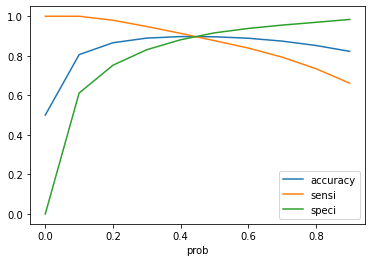

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Class_Prob.map( lambda x: 1 if x >= 0.41 else 0)
y_train_pred_final.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,7.569988e-01,1,1,1,1,1,1,1,1,0,0,1
1,0,7.499926e-02,1,0,0,0,0,0,0,0,0,0,0
2,0,1.782878e-01,1,1,0,0,0,0,0,0,0,0,0
3,0,2.698651e-07,1,0,0,0,0,0,0,0,0,0,0
4,0,2.249466e-02,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final.final_predicted )
confusion2

array([[175527,  22761],
       [ 17827, 180454]])

In [ ]:
X_test_pred = model_1.predict_proba(X_test)
y_test_pred_final = pd.DataFrame({'Class':y_test.values, 'Class_Prob':X_test_pred[:,1]})
y_test_pred_final.head()

,Class,Class_Prob
0,0,0.000068
1,0,0.000245
2,0,0.005374
3,0,0.104777
4,0,0.005204


In [ ]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Class_Prob.map( lambda x: 1 if x >= 0.41 else 0)
y_test_pred_final.head()

,Class,Class_Prob,final_predicted
0,0,0.000068,0
1,0,0.000245,0
2,0,0.005374,0
3,0,0.104777,0
4,0,0.005204,0


In [ ]:
confusion2_test = metrics.confusion_matrix(y_test_pred_final.Class, y_test_pred_final.final_predicted )
confusion2_test

array([[75238,  9727],
       [    9,   144]])

In [ ]:
TP = confusion2_test[1,1] # true positive 
TN = confusion2_test[0,0] # true negatives
FP = confusion2_test[0,1] # false positives
FN = confusion2_test[1,0]
TP / float(TP+FN) # Sensitivity


0.9411764705882353

In [ ]:

TN / float(TN+FP) #Specificity

0.8855175660566116

In [ ]:
f1_score(y_test_pred_final.Class,y_test_pred_final.final_predicted)

0.028731045490822026

### Checking on Random Oversampled data - logistic regression

In [ ]:
logreg = LogisticRegression()
model_1 = logreg.fit(X_over, y_over)

In [ ]:
X_train_pred = model_1.predict_proba(X_over)
X_train_pred[:,1]

array([0.39511467, 0.03188314, 0.06450924, ..., 1.        , 0.99999999,
       1.        ])

In [ ]:
y_train_pred_final = pd.DataFrame({'Class':y_over, 'Class_Prob':X_train_pred[:,1]})
y_train_pred_final.head()

,Class,Class_Prob
0,0,0.395115
1,0,0.031883
2,0,0.064509
3,0,0.000023
4,0,0.012125


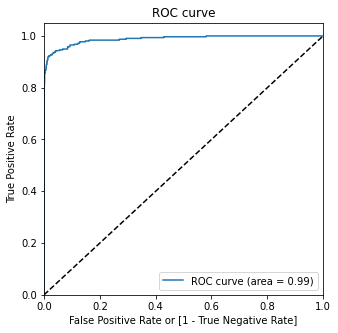

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Class, y_train_pred_final.Class_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Class, y_train_pred_final.Class_Prob)

In [ ]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Class_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.395115,1,1,1,1,0,0,0,0,0,0
1,0,0.031883,1,0,0,0,0,0,0,0,0,0
2,0,0.064509,1,0,0,0,0,0,0,0,0,0
3,0,0.000023,1,0,0,0,0,0,0,0,0,0
4,0,0.012125,1,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.890783  0.983837  0.797729
0.2   0.2  0.931599  0.965051  0.898148
0.3   0.3  0.942931  0.946144  0.939719
0.4   0.4  0.949213  0.936733  0.961692
0.5   0.5  0.950501  0.926869  0.974134
0.6   0.6  0.951507  0.920646  0.982369
0.7   0.7  0.946573  0.905183  0.987962
0.8   0.8  0.939361  0.886821  0.991901
0.9   0.9  0.928758  0.861555  0.995960


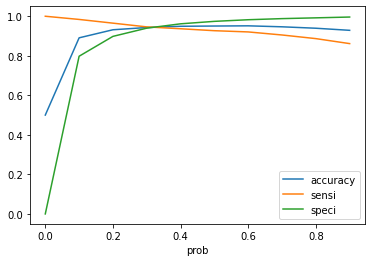

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Class_Prob.map( lambda x: 1 if x >= 0.3 else 0)
y_train_pred_final.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.395115,1,1,1,1,0,0,0,0,0,0,1
1,0,0.031883,1,0,0,0,0,0,0,0,0,0,0
2,0,0.064509,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000023,1,0,0,0,0,0,0,0,0,0,0
4,0,0.012125,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final.final_predicted )
confusion2

array([[186335,  11953],
       [ 10679, 187609]])

In [ ]:
X_test_pred = model_1.predict_proba(X_test)

In [ ]:
y_test_pred_final = pd.DataFrame({'Class':y_test.values, 'Class_Prob':X_test_pred[:,1]})
y_test_pred_final.head()

,Class,Class_Prob
0,0,0.000403
1,0,0.000539
2,0,0.003790
3,0,0.059325
4,0,0.007230


In [ ]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Class_Prob.map( lambda x: 1 if x >= 0.3 else 0)
y_test_pred_final.head()

,Class,Class_Prob,final_predicted
0,0,0.000403,0
1,0,0.000539,0
2,0,0.003790,0
3,0,0.059325,0
4,0,0.007230,0


In [ ]:

confusion2_test = metrics.confusion_matrix(y_test_pred_final.Class, y_test_pred_final.final_predicted )
confusion2_test

array([[79770,  5195],
       [   13,   140]])

In [ ]:
TP = confusion2_test[1,1] # true positive 
TN = confusion2_test[0,0] # true negatives
FP = confusion2_test[0,1] # false positives
FN = confusion2_test[1,0]
TP / float(TP+FN) # Sensitivity

0.9150326797385621

In [ ]:

TN / float(TN+FP) #Specificity

0.9388571764844348

In [ ]:

f1_score(y_test_pred_final.Class,y_test_pred_final.final_predicted)

0.0510204081632653

### Similarly explore other algorithms on balanced dataset by building models like:
- NN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Applying the SVM Model on balanced data to see the final outcome ##

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#### Using all types of balanced datasets, we will build non-linear RBF kernel and try to tune ROC_AUC 


In [ ]:
# Split into train and test datasets
folds = KFold(n_splits = 5 , shuffle = True, random_state = 4)

hyper_params = [ {'gamma' : [1e-2, 1e-3, 1e-4],
                'C' : [1,10,100,1000]}]
model = SVC(kernel= "rbf")
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring = 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv1 = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring = 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv2 = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring = 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)


model_cv3 = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring = 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)



#X_test_adasyn, , y_test_adasyn
#X_test_smote, , y_test_smote
#X_test_over, , y_test_over
# X_test_under, , y_test_under

In [ ]:
model_cv.fit(X_under,y_under)
#model_cv1.fit(X_over,y_over)
#model_cv2.fit(X_smote,y_smote)
#odel_cv3.fit(X_adasyn,y_adasyn)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [ ]:
cv_results = pd.DataFrame (model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009653,0.001290,0.003068,0.000592,1,0.01,"{'C': 1, 'gamma': 0.01}",0.963535,0.966525,0.986208,0.993050,0.962963,0.974456,0.012634,2,0.993092,0.990751,0.990495,0.989655,0.992361,0.991271,0.001264
1,0.007050,0.000443,0.002441,0.000142,1,0.001,"{'C': 1, 'gamma': 0.001}",0.960062,0.971556,0.988345,0.992664,0.966490,0.975823,0.012603,1,0.987751,0.984263,0.980062,0.981022,0.982465,0.983113,0.002718
2,0.012879,0.000863,0.003873,0.000415,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.954081,0.976974,0.989316,0.985135,0.958456,0.972792,0.014132,6,0.981047,0.975183,0.971523,0.975054,0.978664,0.976294,0.003279
3,0.008464,0.000589,0.002376,0.000127,10,0.01,"{'C': 10, 'gamma': 0.01}",0.973953,0.953367,0.992813,0.991506,0.950029,0.972334,0.018148,7,0.998083,0.997468,0.998348,0.997384,0.998455,0.997947,0.000444
4,0.005701,0.000417,0.001864,0.000046,10,0.001,"{'C': 10, 'gamma': 0.001}",0.958325,0.960720,0.987762,0.993243,0.971781,0.974366,0.014043,3,0.991657,0.989292,0.985635,0.985327,0.986001,0.987582,0.002486


In [ ]:
plt.figure(figsize = (16,6))
plt.plot(cv_results["param_C"], cv_results['mean_test_score'])
plt.plot(cv_results["param_C"], cv_results["mean_train_score"])
plt.xlabel('Type of features')
plt.ylabel('ROC-AUC')
plt.title('Optimal Feature C')
plt.legend(['test score', 'train_score'], loc = 'upper left')

KeyError: ignored

<Figure size 1152x432 with 0 Axes>

In [ ]:
model_undersampled = SVC(C=1, gamma = 0.001, kernel = "rbf")

model_undersampled.fit(X_under,y_under)
y_pred = model_undersampled.predict(X_test)

print(metrics.confusion_matrix(y_test,y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test,y_pred))
print("sensitivity/recall", metrics.recall_score(y_test,y_pred))

[[56286   347]
 [   13   100]] 

accuracy 0.9936559405068198
sensitivity/recall 0.8849557522123894


#### We will use SMOTE/oversampled data in tree based models where we need enough amount of data to train the model ####

### Applying the XGBoost Model to see the final outcome ##

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
folds = 2
param_grid = {'subsample' : [0.6,0.7],
              'max_depth' : [5,6],
              'learning_rate' : [0.1,0.2],
              'n_estimators' : [200,300],

}

xgb_model = XGBClassifier()

model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring = 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_smote,y_smote)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed: 94.9min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [5, 6],
                         'n_estimators': [200, 300], 'subsample': [0.6, 0.7]},
             pre_dispat

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,130.439137,0.078008,1.968432,0.010098,0.1,5,200,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999979,0.999967,0.999973,6.036604e-06,16,0.999998,0.999999,0.999998,3.697022e-07
1,135.179231,0.222910,1.967583,0.048608,0.1,5,200,0.7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999978,0.999971,0.999975,3.374652e-06,15,0.999998,0.999998,0.999998,1.018360e-07
2,193.556677,1.172400,2.948617,0.029303,0.1,5,300,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999989,0.999982,0.999986,3.722049e-06,10,1.000000,1.000000,1.000000,1.526014e-10
3,197.788970,1.741135,2.951169,0.039113,0.1,5,300,0.7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999986,0.999983,0.999985,1.513958e-06,11,1.000000,1.000000,1.000000,1.017343e-10
4,159.300302,0.066104,2.386057,0.010318,0.1,6,200,0.6,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.999984,0.999982,0.999983,1.231849e-06,14,1.000000,1.000000,1.000000,3.052027e-09
5,165.496101,0.201239,2.337802,0.051684,0.1,6,200,0.7,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.999985,0.999982,0.999983,1.486134e-06,13,1.000000,1.000000,1.000000,4.069369e-10
6,228.244889,1.851704,3.517317,0.047446,0.1,6,300,0.6,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.999988,0.999986,0.999987,1.038732e-06,7,1.000000,1.000000,1.000000,0.000000e+00
7,231.469756,0.075973,3.550434,0.048468,0.1,6,300,0.7,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.999989,0.999986,0.999987,1.247999e-06,6,1.000000,1.000000,1.000000,0.000000e+00
8,124.182558,1.855353,1.992116,0.020115,0.2,5,200,0.6,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.999986,0.999982,0.999984,2.261806e-06,12,1.000000,1.000000,1.000000,0.000000e+00
9,134.505458,1.013529,2.097458,0.015735,0.2,5,200,0.7,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.999985,0.999987,0.999986,6.900888e-07,9,1.000000,1.000000,1.000000,0.000000e+00


In [ ]:
model = XGBClassifier (learning_rate = 0.2, max_depth = 6, n_estimators= 300 , subsample= 0.7)

model.fit(X_smote,y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [ ]:
X_train_pred = model.predict_proba(X_smote)

In [ ]:
y_smote

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
y_train_pred_final = pd.DataFrame({'Class':y_smote, 'Class_Prob':X_train_pred[:,1]})
y_train_pred_final.head()

,Class,Class_Prob
0,0,6.795019e-07
1,0,5.231004e-06
2,0,9.319572e-06
3,0,7.901949e-07
4,0,2.777730e-07


In [ ]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Class_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,6.795019e-07,1,0,0,0,0,0,0,0,0,0
1,0,5.231004e-06,1,0,0,0,0,0,0,0,0,0
2,0,9.319572e-06,1,0,0,0,0,0,0,0,0,0
3,0,7.901949e-07,1,0,0,0,0,0,0,0,0,0
4,0,2.777730e-07,1,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensi  speci
0.0   0.0       0.5    1.0    0.0
0.1   0.1       1.0    1.0    1.0
0.2   0.2       1.0    1.0    1.0
0.3   0.3       1.0    1.0    1.0
0.4   0.4       1.0    1.0    1.0
0.5   0.5       1.0    1.0    1.0
0.6   0.6       1.0    1.0    1.0
0.7   0.7       1.0    1.0    1.0
0.8   0.8       1.0    1.0    1.0
0.9   0.9       1.0    1.0    1.0


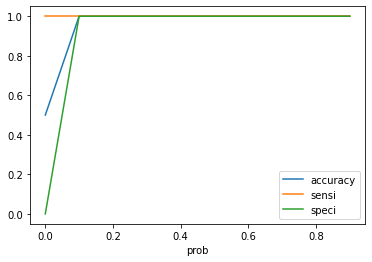

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Class_Prob.map( lambda x: 1 if x >= 0.15 else 0)
y_train_pred_final.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,6.795019e-07,1,0,0,0,0,0,0,0,0,0,0
1,0,5.231004e-06,1,0,0,0,0,0,0,0,0,0,0
2,0,9.319572e-06,1,0,0,0,0,0,0,0,0,0,0
3,0,7.901949e-07,1,0,0,0,0,0,0,0,0,0,0
4,0,2.777730e-07,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
predictions = model.predict_proba(np.array(X_test))
predictions[:10] 

array([[1.0000000e+00, 2.9513290e-09],
       [1.0000000e+00, 6.6380940e-10],
       [1.0000000e+00, 3.7373726e-10],
       [1.0000000e+00, 2.4369395e-08],
       [1.0000000e+00, 9.7051123e-09],
       [1.0000000e+00, 6.2534683e-10],
       [9.9959373e-01, 4.0629282e-04],
       [9.9999982e-01, 1.6706699e-07],
       [1.5858412e-03, 9.9841416e-01],
       [9.9999934e-01, 6.7421263e-07]], dtype=float32)

In [ ]:
prediction_values = model.predict(np.array(X_test))
metrics.accuracy_score(y_test, prediction_values)

0.9993420898047417

In [ ]:
confusion_matrix(y_test, prediction_values)

array([[84931,    34],
       [   22,   131]])

In [ ]:
confusion2_test = confusion_matrix(y_test, prediction_values)
TP = confusion2_test[1,1] # true positive 
TN = confusion2_test[0,0] # true negatives
FP = confusion2_test[0,1] # false positives
FN = confusion2_test[1,0]
TP / float(TP+FN) # Sensitivity

0.8562091503267973

In [ ]:
TN / (TN + FP) #Specificity

0.9995998352262696

In [ ]:
f1_score(y_test,prediction_values) # Very good F1 score compared to logistic regression since we had 5-6% F1 score due to poor precision

0.8238993710691823

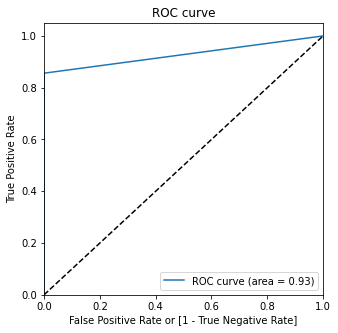

In [ ]:
draw_roc(y_test, prediction_values)

#### Building the XGboost model using ADASYN data

In [ ]:
model = XGBClassifier (learning_rate = 0.2, max_depth = 6, n_estimators= 300 , subsample= 0.7)

model.fit(X_adasyn,y_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [ ]:
prediction_values = model.predict(np.array(X_test))
metrics.accuracy_score(y_test, prediction_values)

0.9992598510303343

In [ ]:
confusion_matrix(y_test, prediction_values)

array([[84925,    40],
       [   23,   130]])

In [ ]:
confusion2_test = confusion_matrix(y_test, prediction_values)
TP = confusion2_test[1,1] # true positive 
TN = confusion2_test[0,0] # true negatives
FP = confusion2_test[0,1] # false positives
FN = confusion2_test[1,0]
TP / float(TP+FN) # Sensitivity

0.8496732026143791

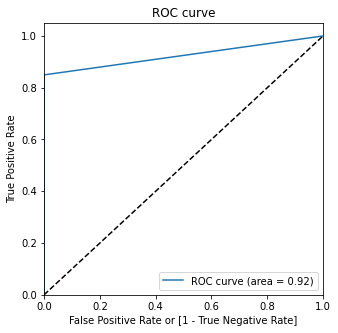

In [ ]:
draw_roc(y_test, prediction_values)

#### Checking XGBoost with random oversampled data

In [ ]:
model = XGBClassifier (learning_rate = 0.2, max_depth = 6, n_estimators= 300 , subsample= 0.7)

model.fit(X_over,y_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [ ]:
prediction_values = model.predict(np.array(X_test))
metrics.accuracy_score(y_test, prediction_values)

0.9995183157499001

In [ ]:
confusion_matrix(y_test, prediction_values)

array([[84947,    18],
       [   23,   130]])

In [ ]:
confusion2_test = confusion_matrix(y_test, prediction_values)
TP = confusion2_test[1,1] # true positive 
TN = confusion2_test[0,0] # true negatives
FP = confusion2_test[0,1] # false positives
FN = confusion2_test[1,0]
TP / float(TP+FN) # Sensitivity

0.8496732026143791

In [ ]:
TN / (TN+FP) #Specificity

0.9997881480609663

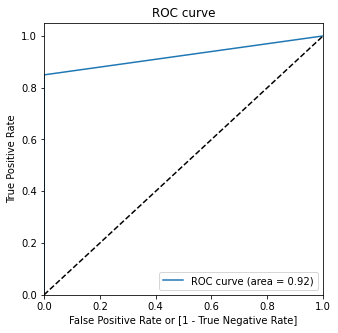

In [ ]:
draw_roc(y_test, prediction_values)

### Applying random forest on balanced data to see the final outcome

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'max_depth' : range(5,7),
    'max_features' : ['sqrt', 0.7],
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [100,300]
}

n_folds = StratifiedKFold(n_splits = 2, shuffle = True, random_state = 2)

forest = RandomForestClassifier(oob_score = True)

model = GridSearchCV(estimator=forest, cv=n_folds, param_grid=param_grid,return_train_score=True , scoring="roc_auc", n_jobs=-1, verbose=1)

In [ ]:
model.fit(X_smote,y_smote)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 130.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=2, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                             

In [ ]:
scores_rf_pca = pd.DataFrame(model.cv_results_)
scores_rf_pca

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,71.503872,0.281910,1.487927,0.003770,gini,5,sqrt,100,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.993559,0.993921,0.993740,0.000181,14,0.993788,0.993966,0.993877,0.000089
1,214.646901,1.601705,4.487024,0.027852,gini,5,sqrt,300,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.993906,0.994051,0.993979,0.000072,13,0.994101,0.994115,0.994108,0.000007
2,266.599290,1.443092,1.449117,0.014187,gini,5,0.7,100,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.993350,0.993090,0.993220,0.000130,16,0.993546,0.993203,0.993375,0.000171
3,796.994475,5.466741,4.192017,0.096898,gini,5,0.7,300,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.993448,0.993397,0.993422,0.000025,15,0.993639,0.993507,0.993573,0.000066
4,84.748966,0.155552,1.621599,0.016799,gini,6,sqrt,100,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.996036,0.996139,0.996087,0.000052,6,0.996219,0.996230,0.996224,0.000005
5,256.945163,1.706373,4.714121,0.027196,gini,6,sqrt,300,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.996324,0.996295,0.996310,0.000015,5,0.996512,0.996369,0.996440,0.000072
6,328.742833,1.963292,1.586011,0.005337,gini,6,0.7,100,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.995830,0.995803,0.995816,0.000014,8,0.996041,0.995883,0.995962,0.000079
7,987.617442,5.092812,4.634206,0.048559,gini,6,0.7,300,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.995839,0.995933,0.995886,0.000047,7,0.996052,0.996020,0.996036,0.000016
8,120.031886,0.123689,1.631350,0.001523,entropy,5,sqrt,100,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.994404,0.994873,0.994639,0.000235,12,0.994650,0.994852,0.994751,0.000101
9,357.171414,0.619546,4.647182,0.035601,entropy,5,sqrt,300,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.994741,0.994659,0.994700,0.000041,11,0.994997,0.994645,0.994821,0.000176


In [ ]:
print('best ROC-AUC', model.best_score_)
print(model.best_estimator_)

best ROC-AUC 0.9978564415455038
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features=0.7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
model_RF  = RandomForestClassifier(criterion='entropy', random_state = 100, max_depth = 6, n_estimators = 300, oob_score = True, 
                                    )
model_RF.fit(X_smote,y_smote) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf_train = model_RF.predict(X_smote)

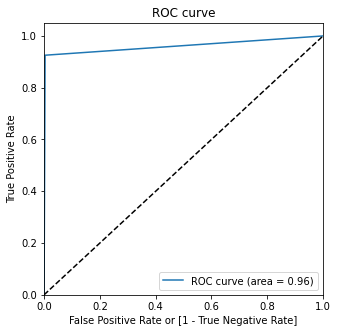

In [ ]:
draw_roc(y_smote, y_pred_rf_train)

In [ ]:
print(classification_report(y_smote,y_pred_rf_train))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    198288
           1       1.00      0.93      0.96    198288

    accuracy                           0.96    396576
   macro avg       0.96      0.96      0.96    396576
weighted avg       0.96      0.96      0.96    396576



In [ ]:
y_pred_rf = model_RF.predict(X_test)

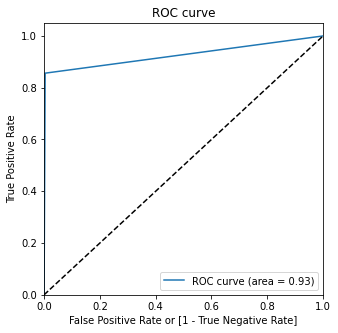

In [ ]:
draw_roc(y_test, y_pred_rf)

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84965
           1       0.29      0.86      0.43       153

    accuracy                           1.00     85118
   macro avg       0.64      0.93      0.71     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_rf)

In [ ]:
TN  = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

TN / float(TN+FP) #Specificity

0.9961513564408874

In [ ]:
cm

array([[84638,   327],
       [   22,   131]])

In [ ]:
print("accuracy", metrics.accuracy_score(y_test,y_pred_rf))
print("recall", metrics.recall_score(y_test,y_pred_rf))

accuracy 0.9958998096759792
recall 0.8562091503267973


In [ ]:
f1_score(y_test,y_pred_rf)

0.4288052373158756

#### Applying ADASYN data on the random forest model

In [ ]:
param_grid = {
    'max_depth' : range(5,7),
    'max_features' : ['sqrt', 'log2'],
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [100,300]
}

n_folds = StratifiedKFold(n_splits = 2, shuffle = True, random_state = 2)

forest = RandomForestClassifier(oob_score = True)

model = GridSearchCV(estimator=forest, cv=n_folds, param_grid=param_grid,return_train_score=True , scoring="roc_auc", n_jobs=-1, verbose=1)
model.fit(X_adasyn,y_adasyn)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 49.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=2, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                             

In [ ]:
scores_rf_pca = pd.DataFrame(model.cv_results_)
scores_rf_pca

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,68.654912,0.116028,1.665968,0.016708,gini,5,sqrt,100,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.987636,0.988326,0.987981,0.000345,15,0.987636,0.988704,0.988170,5.337621e-04
1,204.408662,0.265095,4.822717,0.025968,gini,5,sqrt,300,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.988483,0.988178,0.988330,0.000152,13,0.988466,0.988522,0.988494,2.838815e-05
2,57.532160,0.006592,1.677703,0.002319,gini,5,log2,100,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.989358,0.988723,0.989040,0.000318,9,0.989378,0.989064,0.989221,1.569989e-04
3,169.708782,0.363349,4.871853,0.046839,gini,5,log2,300,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.988366,0.988155,0.988260,0.000105,14,0.988335,0.988515,0.988425,9.017581e-05
4,78.535119,0.297774,1.816509,0.063031,gini,6,sqrt,100,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.992827,0.993227,0.993027,0.000200,8,0.992874,0.993522,0.993198,3.238945e-04
5,247.438275,0.742280,5.149505,0.103353,gini,6,sqrt,300,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.993404,0.993028,0.993216,0.000188,6,0.993436,0.993328,0.993382,5.407121e-05
6,66.302503,0.074818,1.707274,0.024247,gini,6,log2,100,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.993139,0.993220,0.993180,0.000040,7,0.993133,0.993499,0.993316,1.830188e-04
7,204.002372,0.257855,5.065435,0.100564,gini,6,log2,300,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.993493,0.993421,0.993457,0.000036,5,0.993505,0.993719,0.993612,1.068430e-04
8,111.312503,0.176194,1.488764,0.009383,entropy,5,sqrt,100,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.987698,0.987753,0.987726,0.000027,16,0.987754,0.988068,0.987911,1.574578e-04
9,328.894077,0.287069,4.562904,0.076435,entropy,5,sqrt,300,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.988296,0.988699,0.988497,0.000202,11,0.988336,0.989076,0.988706,3.703568e-04


In [ ]:
model_RF  = RandomForestClassifier(criterion='entropy', random_state = 100, max_depth = 6, n_estimators = 300, oob_score = True, 
                                   
                                    )
model_RF.fit(X_adasyn,y_adasyn) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

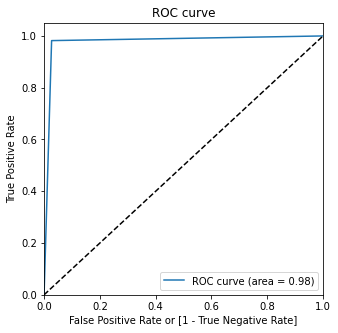

In [ ]:
y_pred_rf_train = model_RF.predict(X_smote)
draw_roc(y_smote, y_pred_rf_train)

In [ ]:
print(classification_report(y_smote,y_pred_rf_train))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98    198288
           1       0.97      0.98      0.98    198288

    accuracy                           0.98    396576
   macro avg       0.98      0.98      0.98    396576
weighted avg       0.98      0.98      0.98    396576



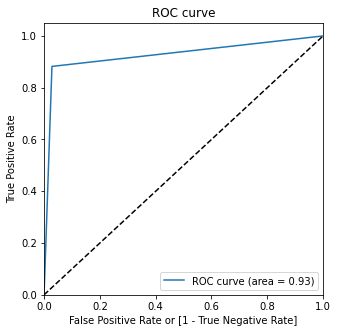

In [ ]:
y_pred_rf = model_RF.predict(X_test)
draw_roc(y_test, y_pred_rf)

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84965
           1       0.06      0.88      0.10       153

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.55     85118
weighted avg       1.00      0.97      0.98     85118



In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_rf)

In [ ]:
cm

array([[82568,  2397],
       [   18,   135]])

In [ ]:
TN  = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


TN / float(TN+FP) #Specificity

0.9717883834520097

### Applying Random oversampled data on random forest model

In [ ]:
model_RF  = RandomForestClassifier(criterion='entropy', random_state = 100, max_depth = 6, n_estimators = 300, oob_score = True, 
                              
                                    )
model_RF.fit(X_over,y_over) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

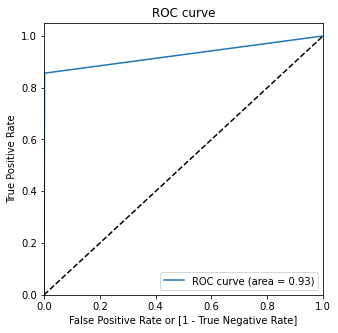

In [ ]:
y_pred_rf = model_RF.predict(X_test)
draw_roc(y_test, y_pred_rf)

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84965
           1       0.47      0.86      0.61       153

    accuracy                           1.00     85118
   macro avg       0.73      0.93      0.80     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:

cm = metrics.confusion_matrix(y_test, y_pred_rf)
TN  = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

TN / float(TN+FP) #Specificity


0.9982581062790561

In [ ]:
cm

array([[84817,   148],
       [   22,   131]])

In [ ]:
print("accuracy", metrics.accuracy_score(y_test,y_pred_rf))
print("recall", metrics.recall_score(y_test,y_pred_rf))

accuracy 0.9980027726215371
recall 0.8562091503267973


In [ ]:
f1_score(y_test,y_pred_rf)

0.6064814814814815

### Applying the Decision Tree on balanced data to see final outcome

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {
    'max_depth' : range(5,7),
    'max_features' : [1,'sqrt'],
    'criterion' : ["entropy","gini"],
    'min_samples_split' : range(40,500,100)
    #'min_samples_leaf' : range()

}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 2, verbose = 1, return_train_score=True, scoring = 'roc_auc')

grid_search.fit(X_smote,y_smote)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.0min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [ ]:
scores_dt = pd.DataFrame(grid_search.cv_results_)
scores_dt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.286816,0.005134,0.060848,0.001449,entropy,5,1,40,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.944530,0.931844,0.938187,0.006343,32,0.944017,0.933675,0.938846,0.005171
1,0.297635,0.012760,0.061969,0.000483,entropy,5,1,140,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.956329,0.881826,0.919077,0.037252,35,0.956045,0.883191,0.919618,0.036427
2,0.300169,0.004575,0.060719,0.001532,entropy,5,1,240,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.921977,0.856419,0.889198,0.032779,40,0.921146,0.858996,0.890071,0.031075
3,0.286824,0.000467,0.061841,0.001835,entropy,5,1,340,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.930282,0.907283,0.918782,0.011500,36,0.929841,0.908468,0.919154,0.010686
4,0.281971,0.007363,0.060747,0.001665,entropy,5,1,440,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.925807,0.933357,0.929582,0.003775,33,0.924852,0.934929,0.929891,0.005039
5,1.184541,0.006447,0.059822,0.000501,entropy,5,sqrt,40,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.971316,0.955320,0.963318,0.007998,20,0.971271,0.956313,0.963792,0.007479
6,1.174920,0.009926,0.062100,0.001772,entropy,5,sqrt,140,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.982923,0.971651,0.977287,0.005636,11,0.982681,0.972608,0.977645,0.005037
7,1.175756,0.027572,0.059439,0.000974,entropy,5,sqrt,240,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.982343,0.965890,0.974116,0.008227,14,0.982140,0.966981,0.974560,0.007580
8,1.165230,0.021824,0.059338,0.000786,entropy,5,sqrt,340,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.975246,0.984090,0.979668,0.004422,7,0.974954,0.984808,0.979881,0.004927
9,1.171710,0.008306,0.058129,0.000975,entropy,5,sqrt,440,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.975985,0.974020,0.975002,0.000982,13,0.976000,0.974796,0.975398,0.000602


In [ ]:
clf_gini  = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth = 6,max_features='sqrt',min_samples_split = 340)
clf_gini.fit(X_smote,y_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=340,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
y_pred_dt = clf_gini.predict(X_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84965
           1       0.06      0.86      0.11       153

    accuracy                           0.97     85118
   macro avg       0.53      0.92      0.55     85118
weighted avg       1.00      0.97      0.99     85118



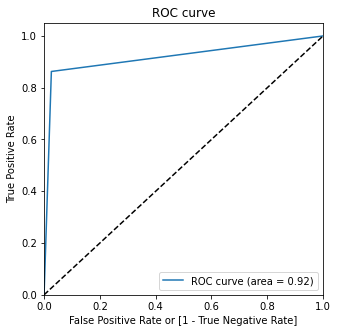

In [ ]:
draw_roc(y_test, y_pred_dt)

In [ ]:

cm = metrics.confusion_matrix(y_test, y_pred_dt)
TN  = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


TN / float(TN+FP) #Specificity

0.9738362855293357

In [ ]:
cm

array([[82742,  2223],
       [   21,   132]])

In [ ]:

print("accuracy", metrics.accuracy_score(y_test,y_pred_dt))
print("recall", metrics.recall_score(y_test,y_pred_dt))

accuracy 0.9736365986042905
recall 0.8627450980392157


In [ ]:

f1_score(y_test,y_pred_dt)

0.10526315789473685

#### Applying Decision Tree on ADASYN Data

In [ ]:
param_grid = {
    'max_depth' : range(5,7),
    'max_features' : [0.6,0.8,1,'sqrt'],
    'criterion' : ["entropy","gini"],
    'min_samples_split' : range(40,500,100)
    #'min_samples_leaf' : range()

}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 2, verbose = 1, return_train_score=True, scoring = 'roc_auc')

grid_search.fit(X_adasyn,y_adasyn)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  6.4min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [ ]:
scores_dt = pd.DataFrame(grid_search.cv_results_)
scores_dt.loc[scores_dt['rank_test_score'] == 1, :]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
28,5.748092,0.184193,0.058532,0.000354,entropy,6,0.8,340,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.961761,0.939845,0.950803,0.010958,1,0.982838,0.990888,0.986863,0.004025


In [ ]:
clf_gini  = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth = 6,max_features=0.8,min_samples_split = 340)
clf_gini.fit(X_adasyn,y_adasyn)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=0.8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=340,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
y_pred_dt = clf_gini.predict(X_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     84965
           1       0.02      0.89      0.04       153

    accuracy                           0.93     85118
   macro avg       0.51      0.91      0.50     85118
weighted avg       1.00      0.93      0.96     85118



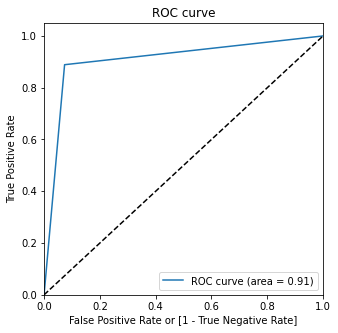

In [ ]:
draw_roc(y_test, y_pred_dt)

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_dt)
TN  = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


TN / float(TN+FP) #Specificity

0.9264756076031307

In [ ]:
cm

array([[78718,  6247],
       [   17,   136]])

In [ ]:
print("accuracy", metrics.accuracy_score(y_test,y_pred_dt))
print("recall", metrics.recall_score(y_test,y_pred_dt))

accuracy 0.9264080453018163
recall 0.8888888888888888


In [ ]:

f1_score(y_test,y_pred_dt)

0.0416156670746634

### Applying oversampled data on Decision Tree

In [ ]:
clf_gini  = DecisionTreeClassifier(criterion="gini",random_state=100,max_depth = 6)
clf_gini.fit(X_over,y_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
y_pred_dt = clf_gini.predict(X_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     84965
           1       0.05      0.84      0.09       153

    accuracy                           0.97     85118
   macro avg       0.52      0.91      0.54     85118
weighted avg       1.00      0.97      0.98     85118



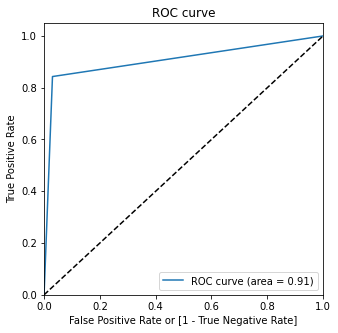

In [ ]:
draw_roc(y_test, y_pred_dt)

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_dt)
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


TN / float(TN+FP) #Specificity

0.9698699464485376

In [ ]:
cm

array([[82405,  2560],
       [   24,   129]])

In [ ]:
print("accuracy", metrics.accuracy_score(y_test,y_pred_dt))
print("recall", metrics.recall_score(y_test,y_pred_dt))

accuracy 0.9696421438473648
recall 0.8431372549019608


In [ ]:

f1_score(y_test,y_pred_dt)

0.09078114004222378

### Gaussian Naive Bayes on Balanced dataset

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:
# train a Gaussian Naive Bayes classifier on the training set and instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_smote, y_smote)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9740


In [ ]:
print('Training set score: {:.4f}'.format(gnb.score(X_smote, y_smote)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.9087
Test set score: 0.9740


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[82775,  2190],
       [   22,   131]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84965
           1       0.06      0.86      0.11       153

    accuracy                           0.97     85118
   macro avg       0.53      0.92      0.55     85118
weighted avg       1.00      0.97      0.99     85118



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)

print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

Precision : 0.9742
Recall or Sensitivity : 0.9997
Specificity : 0.0564
False Positive Rate : 0.9436
True Positive Rate : 0.9997


In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.9868146540932988

In [ ]:
f1_score(y_test,y_pred)

0.1059013742926435

In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[1.00000000e+00, 1.37241574e-12],
       [1.00000000e+00, 1.50390696e-11],
       [1.00000000e+00, 1.13343636e-13],
       [1.00000000e+00, 1.53297375e-13],
       [1.00000000e+00, 1.43517080e-13],
       [1.00000000e+00, 3.29820323e-11],
       [1.00000000e+00, 1.72770819e-11],
       [8.10410194e-01, 1.89589806e-01],
       [2.37701080e-12, 1.00000000e+00],
       [1.00000000e+00, 2.42253697e-10]])

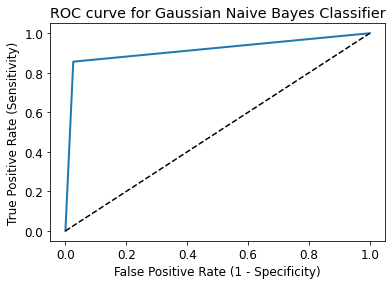

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

### Trying on adasyn data

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set and instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_adasyn, y_adasyn)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(gnb.score(X_adasyn, y_adasyn)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Model accuracy score: 0.9613
Training set score: 0.7208
Test set score: 0.9613
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     84965
           1       0.04      0.88      0.08       153

    accuracy                           0.96     85118
   macro avg       0.52      0.92      0.53     85118
weighted avg       1.00      0.96      0.98     85118



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[81690,  3275],
       [   19,   134]])

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)

print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

Precision : 0.9615
Recall or Sensitivity : 0.9998
Specificity : 0.0393
False Positive Rate : 0.9607
True Positive Rate : 0.9998


In [ ]:
f1_score(y_test,y_pred)

0.07523862998315554

In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.9802368695777386

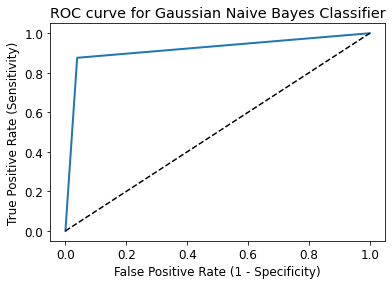

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## Trying Neural Networks on the balanced data

In [ ]:
import pickle
import h5py
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasClassifier

### Neural Network model on SMOTE data

In [ ]:
y_smote_neural = y_smote.copy()

In [ ]:
y_smote_neural = y_smote_neural.reshape(1,(len(y_smote_neural)))

In [ ]:
y_test_neural = y_test.copy()

In [ ]:
y_test_neural = np.array(y_test_neural).reshape(1,(len(y_test_neural)))

In [ ]:
y_smote_neural = y_smote_neural.T
y_test_neural = y_test_neural.T

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(16,input_dim = 29, activation = "relu"))
nn_model.add(Dense(24,activation="relu"))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(20,activation="relu"))
nn_model.add(Dense(24,activation="relu"))
nn_model.add(Dense(1,activation="sigmoid"))

In [ ]:
nn_model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
nn_model.fit(X_smote,y_smote_neural,batch_size=15,epochs=5)

Epoch 1/5
26439/26439 [==============================] - 61s 2ms/step - loss: 0.0063 - accuracy: 0.9986
Epoch 2/5
26439/26439 [==============================] - 60s 2ms/step - loss: 0.0057 - accuracy: 0.9987
Epoch 3/5
26439/26439 [==============================] - 60s 2ms/step - loss: 0.0057 - accuracy: 0.9988
Epoch 4/5
26439/26439 [==============================] - 60s 2ms/step - loss: 0.0054 - accuracy: 0.9988
Epoch 5/5
26439/26439 [==============================] - 61s 2ms/step - loss: 0.0053 - accuracy: 0.9989


In [ ]:
scores_train = nn_model.evaluate(X_smote,y_smote_neural)
scores_train

12393/12393 [==============================] - 17s 1ms/step - loss: 0.0050 - accuracy: 0.9988


[0.004996220115572214, 0.9988425970077515]

In [ ]:
predictions_nn = nn_model.predict(X_test)

In [ ]:
predictions_nn

array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [7.3044120e-32],
       [4.0402522e-26],
       [0.0000000e+00]], dtype=float32)

In [ ]:
cnf_matrix = confusion_matrix(y_test,predictions_nn.round())
cnf_matrix

array([[84791,   174],
       [   23,   130]])

In [ ]:
TN = cnf_matrix[0,0]
TP = cnf_matrix[1,1]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]


TN / float(TN+FP) #Specificity

0.997952097922674

In [ ]:
print("accuracy", metrics.accuracy_score(y_test,predictions_nn.round()))
print("recall", metrics.recall_score(y_test,predictions_nn.round()))

accuracy 0.9976855659202519
recall 0.8496732026143791


In [ ]:
f1_score(y_test,predictions_nn.round())

0.5689277899343544

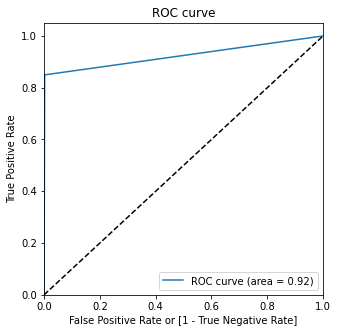

In [ ]:
draw_roc(y_test, predictions_nn.round())

### Neural Network model on Adasyn data

In [ ]:
y_adasyn_neural = y_adasyn.copy()

In [ ]:
y_adasyn_neural = y_adasyn_neural.reshape(1,(len(y_adasyn_neural)))
y_adasyn_neural = y_adasyn_neural.T

In [ ]:
nn_model1 = Sequential()
nn_model1.add(Dense(16,input_dim = 29, activation = "relu"))
nn_model1.add(Dense(24,activation="relu"))
nn_model1.add(Dropout(0.5))
nn_model1.add(Dense(20,activation="relu"))
nn_model1.add(Dense(24,activation="relu"))
nn_model1.add(Dense(1,activation="sigmoid"))

In [ ]:
nn_model1.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
nn_model1.fit(X_adasyn,y_adasyn_neural,batch_size=15,epochs=5)

Epoch 1/5
26438/26438 [==============================] - 67s 3ms/step - loss: 0.0441 - accuracy: 0.9860
Epoch 2/5
26438/26438 [==============================] - 66s 2ms/step - loss: 0.0132 - accuracy: 0.9971
Epoch 3/5
26438/26438 [==============================] - 67s 3ms/step - loss: 0.0096 - accuracy: 0.9981
Epoch 4/5
26438/26438 [==============================] - 66s 2ms/step - loss: 0.0082 - accuracy: 0.9983
Epoch 5/5
26438/26438 [==============================] - 66s 3ms/step - loss: 0.0071 - accuracy: 0.9986


In [ ]:
scores_train = nn_model1.evaluate(X_adasyn,y_adasyn_neural)
scores_train

12393/12393 [==============================] - 22s 2ms/step - loss: 0.0043 - accuracy: 0.9993


[0.004332576412707567, 0.9993141293525696]

In [ ]:
predictions_nn1 = nn_model1.predict(X_test)
predictions_nn1

array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [2.1914835e-33],
       [0.0000000e+00],
       [1.5959696e-34]], dtype=float32)

In [ ]:
cnf_matrix = confusion_matrix(y_test,predictions_nn1.round())
cnf_matrix

array([[84818,   147],
       [   25,   128]])

In [ ]:
TN = cnf_matrix[0,0]
TP = cnf_matrix[1,1]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]


print("Specificity",TN / float(TN+FP)) #Specificity

Specificity 0.9982698758312246


In [ ]:
print("accuracy", metrics.accuracy_score(y_test,predictions_nn1.round()))
print("recall", metrics.recall_score(y_test,predictions_nn1.round()))

accuracy 0.9979792758288494
recall 0.8366013071895425


In [ ]:
f1_score(y_test,predictions_nn1.round())

0.5981308411214954

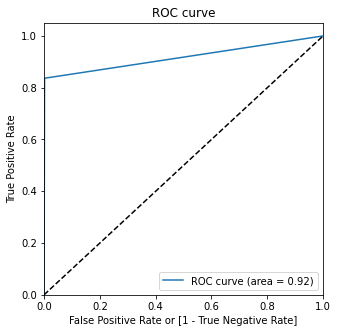

In [ ]:
draw_roc(y_test, predictions_nn1.round())

-----------------------------------------------------------------------------------------------------------------------------------------------

### Building the MLPClassifier

In [ ]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

In [ ]:
#Fitting the training data to the network
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Predicting on test data
y_pred = classifier.predict(X_test)

In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm_mlc = confusion_matrix(y_pred, y_test)
cm_mlc

array([[84948,    28],
       [   17,   125]])

In [ ]:
TP = cm_mlc[0,0]
TN = cm_mlc[1,1]
FP = cm_mlc[0,1]
FN = cm_mlc[1,0]

precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)

print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

Precision : 0.9997
Recall or Sensitivity : 0.9998
Specificity : 0.8170
False Positive Rate : 0.1830
True Positive Rate : 0.9998


In [ ]:
accuracy_score(y_test, y_pred)

0.9994713221645245

In [ ]:
f1_score(y_test,y_pred)

0.847457627118644

In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.9997352022172401

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

We can see , we are obtaining best result from Xg boost Model on Smote data

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
# perform the best oversampling method on X_train & y_train

clf_xgboost = XGBClassifier (learning_rate = 0.2, max_depth = 6, n_estimators= 300 , subsample= 0.7)   #initialise the model with optimum hyperparameters

clf_xgboost.fit(X_smote,y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


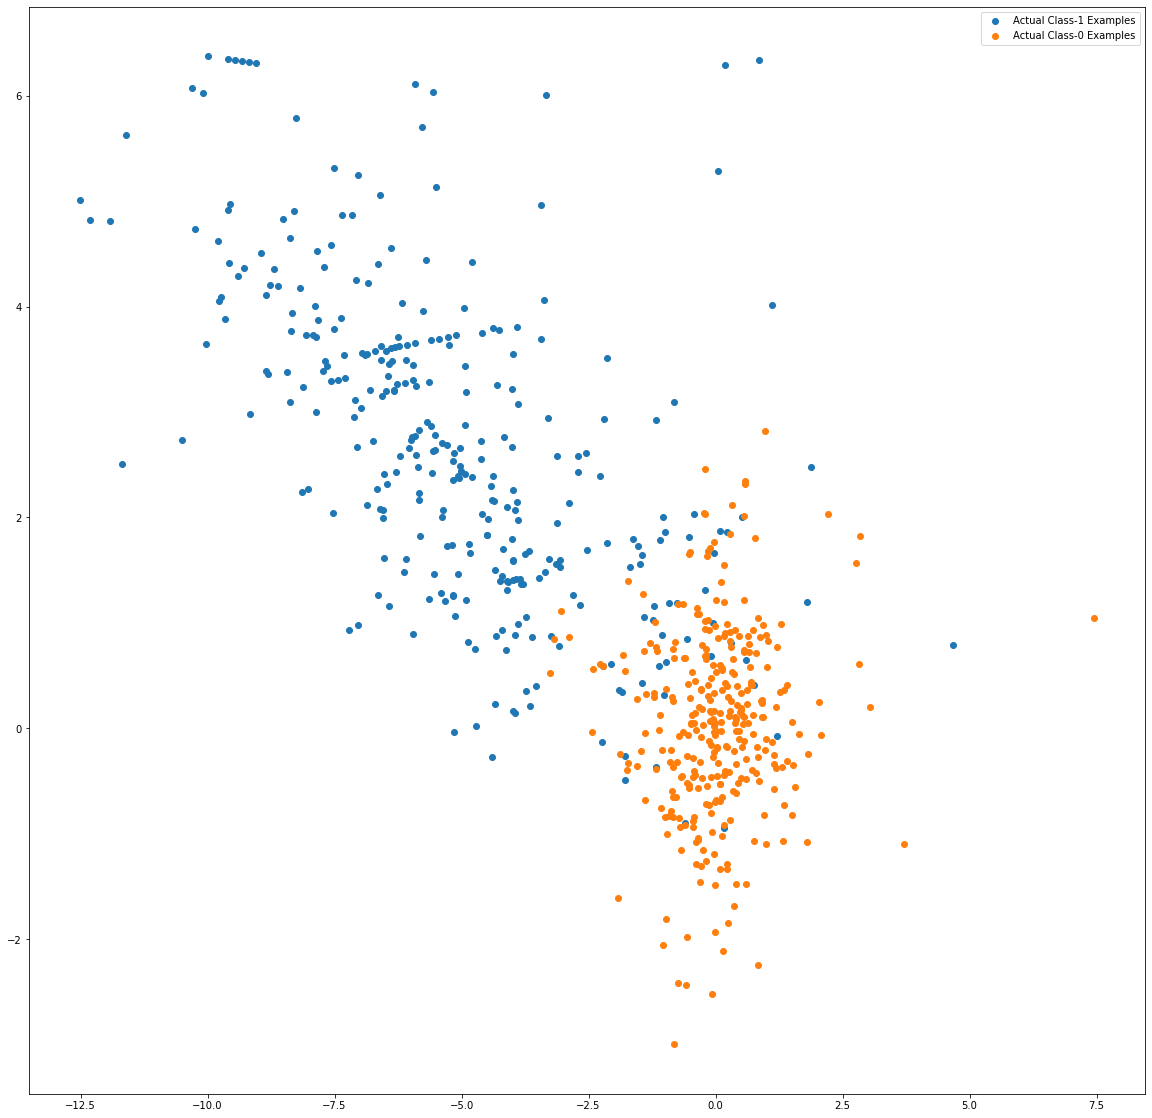

In [ ]:
var_imp = []
for i in clf_xgboost.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_xgboost.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_xgboost.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_xgboost.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_xgboost.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_xgboost.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
features_final=list(X_train.columns.values)
features_final_dict={}

for name,importance in zip(features_final,clf_xgboost.feature_importances_):
    features_final_dict[name]= importance
    

dict_desc = OrderedDict(sorted(features_final_dict.items(),key = lambda kv:kv[1], reverse = True))

In [ ]:
dix1 = dict(dict_desc)

from itertools import islice

def look(n,iterable):
    return list(islice(iterable,n))

n=10
n_items= look(n,dix1.items())

In [ ]:
importance = clf_xgboost.feature_importances_
importance, features = zip(*sorted(zip(importance, features)))


# create dataframe
feature_importance_df = pd.DataFrame({'variables': features, 'importance': importance})

feature_importance_df = feature_importance_df.sort_values(by = 'importance',axis =0, ascending = False)
feature_importance_df[0:15]

,variables,importance
28,V2,0.598990
27,V23,0.070958
26,V19,0.042211
25,V5,0.027416
24,V8,0.026579
23,V14,0.016448
22,V24,0.013361
21,V6,0.013000
20,Amount,0.012827
19,V3,0.012701


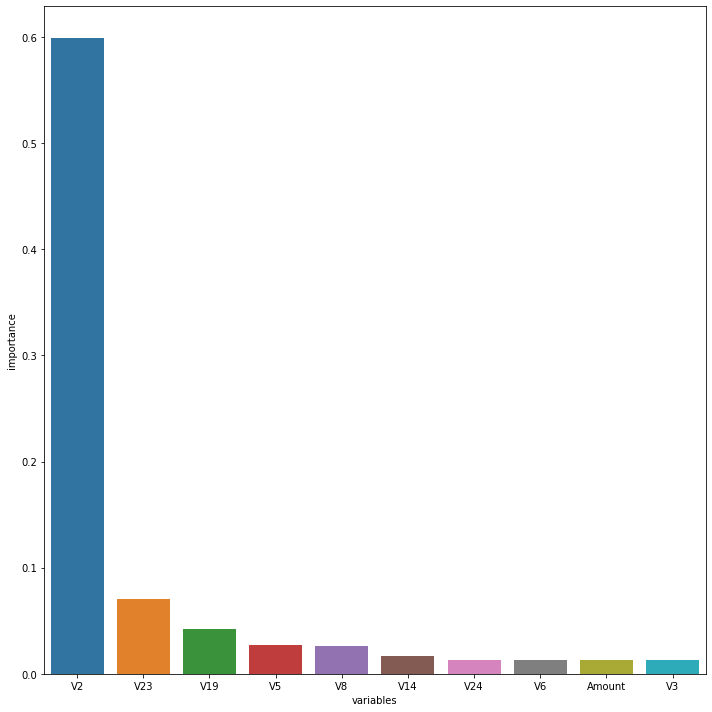

In [ ]:
# Plotting the features
plt.figure(figsize=(10, 10))

sns.barplot(x = "variables",
            y = "importance",
            data = feature_importance_df[0:10])

plt.tight_layout()
plt.show()

# Final Inference

The Credit card Fraud detection is required to predict fraudulent transactions of credit card using ML. As the problem preview said - 

**"For many banks, retaining high profitable customers is the number one business goal.Banking fraud, however, poses a significant threat to this goal for different banks.In terms of substantial financial losses, trust and credibility, is a concerning issue to both banks and customers."**

Thus to predict the fraudualent transactions we created about 6 predictive models as mentioned below -  

1. Logistic Regression Model.
2. Support Vector Machine.
3. Decision Tree Classifier.
4. Random Forest Classifier.
5. Neural Networks
6. Extreme Gradient Boosting with XGBoost

The above models were initially created with default parameters which did not give accurate results and the score metrics were not very good. Then we hypertuned each model and recreated them with the **best estimators**. The hyper tuned model showed an increase in the classification scores though marginally. 

We then performed our analysis by using different balancing techniques

1. Random undersampling
2. Random oversampling
3. Smote
4. Adasyn

**Each of the above models were assessed on Accuracy, precision, recall, F1 score.**

### <font color = OrangeRed> Best Model</font>

Out of all the above models, **Extreme Gradient Boosting with XGBoost** with SMOTE Technique came out as the winner giving the best metrics of scores. 

Let's see the summary of scores for XGBoost model and how it performed.

### <font color = DarkMagenta>Summary of Scores</font>

- with SMOTE Technique:

| specificity | Sensitivity | accuracy | auc_roc || confusion_matrix |
| --- | --- | --- | --- | --- | --- |
| 0.9997292 | 0.849673 | 0.9992598 | 0.927347 || [[84925, 40], [23, 130]] |

**There is a significant improvement in precision, recall, accuracy and auc_roc in the final model of XGBoost.**

# <font color = Darkolive> Top 3 Features </font>

**On imbalanced data**

- v14
- v17
- v10

**On balanced data**
 
- v14
- v4
- v8